# import library

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.inception_v3 import InceptionV3

# import data

In [2]:
base_dir = os.path.join("D:\DATASET_JAMBU\Taftyani")
print("Dataset --> ", os.listdir(base_dir))

Dataset -->  ['KELAS A', 'KELAS B', 'KELAS SUPER', 'luarmutu']


In [3]:
images = []
labels = []
IMG_SIZE = 299
KELAS_A = base_dir + '\KELAS A'
KELAS_B = base_dir + '\KELAS B'
KELAS_SUPER = base_dir + '\KELAS SUPER'
LUARMUTU = base_dir + '\luarmutu'

In [4]:
#fungsi untuk menetapkan label tiap data
def assign_label(img, Mutu_jambu):
    return Mutu_jambu

In [5]:
def make_data(Mutu_jambu, DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img, Mutu_jambu)
        path = os.path.join(DIR,img)
#         img = cv2.imread(path,cv2.IMREAD_COLOR)
#         img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        images.append(np.array(img))
        labels.append(str(label))

In [6]:
make_data('kelas_a', KELAS_A)
print(len(images))

make_data('kelas_b', KELAS_B)
print(len(images))

make_data('kelas_super', KELAS_SUPER)
print(len(images))

make_data('luarmutu', LUARMUTU)
print(len(images))

100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 294.05it/s]


40


100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 300.68it/s]


80


100%|█████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 302.09it/s]


122


100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 20.92it/s]

166


# Preprocessing data

In [7]:
le = LabelEncoder()
Y = le.fit_transform(labels)
Y = to_categorical(Y,4)
X = np.array(images)
X = X/255

In [8]:
#split data menjadi train test dan validation data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(105, 299, 299, 3)
(19, 299, 299, 3)
(42, 299, 299, 3)


In [9]:
#augmentasi pada data training
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

In [10]:
#duplikat data sebanyak skenario yang akan dijalankan agar semua data sama
x_train1, x_val1, x_test1, y_train1, y_val1, y_test1 = x_train, x_val, x_test, y_train, y_val, y_test
x_train2, x_val2, x_test2, y_train2, y_val2, y_test2 = x_train, x_val, x_test, y_train, y_val, y_test
x_train3, x_val3, x_test3, y_train3, y_val3, y_test3 = x_train, x_val, x_test, y_train, y_val, y_test
x_train4, x_val4, x_test4, y_train4, y_val4, y_test4 = x_train, x_val, x_test, y_train, y_val, y_test
x_train5, x_val5, x_test5, y_train5, y_val5, y_test5 = x_train, x_val, x_test, y_train, y_val, y_test
x_train6, x_val6, x_test6, y_train6, y_val6, y_test6 = x_train, x_val, x_test, y_train, y_val, y_test
x_train7, x_val7, x_test7, y_train7, y_val7, y_test7 = x_train, x_val, x_test, y_train, y_val, y_test
x_train8, x_val8, x_test8, y_train8, y_val8, y_test8 = x_train, x_val, x_test, y_train, y_val, y_test
x_train9, x_val9, x_test9, y_train9, y_val9, y_test9 = x_train, x_val, x_test, y_train, y_val, y_test
x_train10, x_val10, x_test10, y_train10, y_val10, y_test10 = x_train, x_val, x_test, y_train, y_val, y_test
x_train11, x_val11, x_test11, y_train11, y_val11, y_test11 = x_train, x_val, x_test, y_train, y_val, y_test
x_train12, x_val12, x_test12, y_train12, y_val12, y_test12 = x_train, x_val, x_test, y_train, y_val, y_test
x_train13, x_val13, x_test13, y_train13, y_val13, y_test13 = x_train, x_val, x_test, y_train, y_val, y_test
x_train14, x_val14, x_test14, y_train14, y_val14, y_test14 = x_train, x_val, x_test, y_train, y_val, y_test
x_train15, x_val15, x_test15, y_train15, y_val15, y_test15 = x_train, x_val, x_test, y_train, y_val, y_test
x_train16, x_val16, x_test16, y_train16, y_val16, y_test16 = x_train, x_val, x_test, y_train, y_val, y_test
x_train17, x_val17, x_test17, y_train17, y_val17, y_test17 = x_train, x_val, x_test, y_train, y_val, y_test
x_train18, x_val18, x_test18, y_train18, y_val18, y_test18 = x_train, x_val, x_test, y_train, y_val, y_test


In [11]:
x_train19, x_val19, x_test19, y_train19, y_val19, y_test19 = x_train, x_val, x_test, y_train, y_val, y_test
x_train20, x_val20, x_test20, y_train20, y_val20, y_test20 = x_train, x_val, x_test, y_train, y_val, y_test
x_train21, x_val21, x_test21, y_train21, y_val21, y_test21 = x_train, x_val, x_test, y_train, y_val, y_test

# permodelan

In [12]:
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
inceptionv3 = InceptionV3(input_shape=(299, 299, 3),
                                    include_top=False,
                                    weights=local_weights_file)
inceptionv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [13]:
for layer in inceptionv3.layers:
    layer.trainable = False

last_layer = inceptionv3.layers[-1]
last_output = last_layer.output

In [14]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inceptionv3.input, x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [15]:
# duplikat model sesuai skenario yang akan dijalankan
# dalam skenario awal ini dilakukan dengan melakukan tuning epochs dan Learning rate
# skenario untuk melihat pengaruh dropout layer dijlankan dalam skenario selanjutnya

model1=model #epochs 100 Lr 0.001(default)
model2=model #epochs 100 Lr 0.005
model3=model #epochs 100 Lr 0.0001
model4=model #epochs 100 Lr 0.0005
model5=model #epochs 100 Lr 0.00001
model6=model #epochs 100 Lr 0.00005

model7=model #epochs 200 Lr 0.001(default)
model8=model #epochs 200 Lr 0.005
model9=model #epochs 200 Lr 0.0001
model10=model #epochs 200 Lr 0.0005
model11=model #epochs 200 Lr 0.00001
model12=model #epochs 200 Lr 0.00005

# ---------Skenario ke 1 epochs 100 dan learning rate 0.001-0.00005 ----------------

# Model 1

# Training

In [16]:
model1.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history1=model1.fit(datagen.flow(x_train1, y_train1),
            validation_data=(x_val1, y_val1),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 28s 5s/step - loss: 21.0697 - accuracy: 0.2571 - val_loss: 11.6198 - val_accuracy: 0.5789
Epoch 2/100
4/4 [==============================] - 2s 457ms/step - loss: 12.6092 - accuracy: 0.4000 - val_loss: 16.3823 - val_accuracy: 0.2632
Epoch 3/100
4/4 [==============================] - 2s 456ms/step - loss: 11.3891 - accuracy: 0.5143 - val_loss: 2.7638 - val_accuracy: 0.6316
Epoch 4/100
4/4 [==============================] - 2s 452ms/step - loss: 5.6382 - accuracy: 0.6857 - val_loss: 3.6142 - val_accuracy: 0.6842
Epoch 5/100
4/4 [==============================] - 2s 459ms/step - loss: 4.7206 - accuracy: 0.7143 - val_loss: 1.3776 - val_accuracy: 0.8947
Epoch 6/100
4/4 [==============================] - 2s 380ms/step - loss: 3.4153 - accuracy: 0.7619 - val_loss: 1.3470 - val_accuracy: 0.8421
Epoch 7/100
4/4 [==============================] - 2s 543ms/step - loss: 2.2799 - accuracy: 0.8095 - val_loss: 0.9044 - val_accuracy: 0.8421
Epoch 8/10

Epoch 59/100
4/4 [==============================] - 2s 564ms/step - loss: 0.8049 - accuracy: 0.9429 - val_loss: 1.3083 - val_accuracy: 0.9474
Epoch 60/100
4/4 [==============================] - 2s 467ms/step - loss: 0.7072 - accuracy: 0.9333 - val_loss: 1.4915 - val_accuracy: 0.9474
Epoch 61/100
4/4 [==============================] - 2s 391ms/step - loss: 0.0687 - accuracy: 0.9810 - val_loss: 0.9021 - val_accuracy: 0.9474
Epoch 62/100
4/4 [==============================] - 2s 393ms/step - loss: 0.3247 - accuracy: 0.9524 - val_loss: 0.9735 - val_accuracy: 0.9474
Epoch 63/100
4/4 [==============================] - 2s 383ms/step - loss: 0.8723 - accuracy: 0.9333 - val_loss: 1.4308 - val_accuracy: 0.9474
Epoch 64/100
4/4 [==============================] - 2s 470ms/step - loss: 0.2390 - accuracy: 0.9810 - val_loss: 1.1752 - val_accuracy: 0.9474
Epoch 65/100
4/4 [==============================] - 2s 469ms/step - loss: 0.6871 - accuracy: 0.9238 - val_loss: 1.2054 - val_accuracy: 0.9474
Epoch 

# evaluasi, testing dan visualisasi

In [18]:
history1.history

{'loss': [21.06968879699707,
  12.609237670898438,
  11.389137268066406,
  5.638185977935791,
  4.720604419708252,
  3.4153120517730713,
  2.279881000518799,
  1.8101906776428223,
  1.746828317642212,
  3.0263190269470215,
  1.3226492404937744,
  1.7772351503372192,
  2.9516093730926514,
  3.178473472595215,
  2.2723910808563232,
  2.180490493774414,
  2.488689661026001,
  1.1573725938796997,
  2.091840982437134,
  1.3716930150985718,
  1.16725754737854,
  1.2093391418457031,
  1.3705319166183472,
  1.797239065170288,
  4.045820713043213,
  1.532006859779358,
  1.329636812210083,
  1.4739338159561157,
  2.49068284034729,
  0.24947233498096466,
  0.8422390222549438,
  0.4358481168746948,
  0.367060124874115,
  0.33191683888435364,
  1.2393752336502075,
  1.2809115648269653,
  1.0835901498794556,
  0.7008962035179138,
  0.5845499634742737,
  0.4040597677230835,
  0.2450396567583084,
  0.4198143780231476,
  0.5083007216453552,
  0.9458549618721008,
  0.3164863884449005,
  0.73189020156860

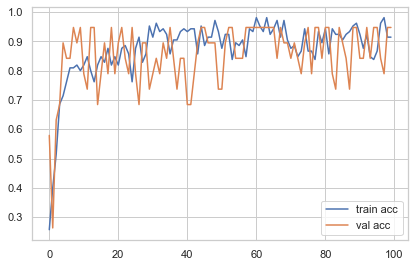

average acc = 0.8751428639888763
average val acc = 0.8552631676197052
max acc = 0.9809523820877075
max val acc = 0.9473684430122375


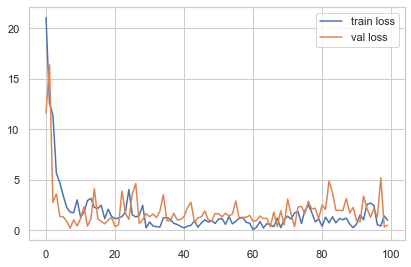

average loss = 1.729373610317707
average val loss = 1.9471964685618877
max loss = 21.06968879699707
max val loss = 16.3823299407959


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history1.history['accuracy'], label='train acc')
plt.plot(history1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta1 = np.mean(history1.history['accuracy'])
print('average acc = {}'.format(ta1))
va1 = np.mean(history1.history['val_accuracy'])
print('average val acc = {}'.format(va1))
ta1a = np.max(history1.history['accuracy'])
print('max acc = {}'.format(ta1a))
va1a = np.max(history1.history['val_accuracy'])
print('max val acc = {}'.format(va1a))

# loss
plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl1 = np.mean(history1.history['loss'])
print('average loss = {}'.format(tl1))
vl1 = np.mean(history1.history['val_loss'])
print('average val loss = {}'.format(vl1))
tl1a = np.max(history1.history['loss'])
print('max loss = {}'.format(tl1a))
vl1a = np.max(history1.history['val_loss'])
print('max val loss = {}'.format(vl1a))

In [20]:
score1 = model1.evaluate(x_val1, y_val1,  verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.5060568451881409
Test accuracy: 0.9473684430122375


In [21]:
Y_pred1 = model1.predict_generator(x_test1)
y_pred1 = np.argmax(Y_pred1, axis=1)
y_test1 = np.argmax(y_test1, axis=1)
cm1 = confusion_matrix(y_test1, y_pred1)
print(cm1)

[[ 4  1  3  0]
 [ 0 11  0  0]
 [ 0  1 11  0]
 [ 0  1  0 10]]


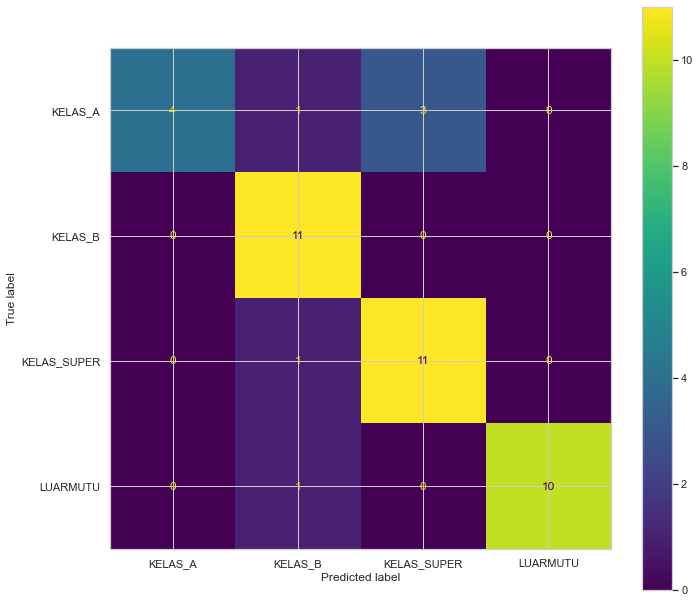

In [23]:
fig,ax= plt.subplots(figsize=(10,10))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test1, y_pred1, ax=ax, display_labels=target_names)
plt.show()

In [24]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test1, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       1.00      0.50      0.67         8
     KELAS_B       0.79      1.00      0.88        11
 KELAS_SUPER       0.79      0.92      0.85        12
    LUARMUTU       1.00      0.91      0.95        11

    accuracy                           0.86        42
   macro avg       0.89      0.83      0.84        42
weighted avg       0.88      0.86      0.85        42



# --------------------------------------------------------------------------------

# Model 2

# Training

In [16]:
model2.compile(optimizer=Adam(lr=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history2=model2.fit(datagen.flow(x_train2, y_train2),
            validation_data=(x_val2, y_val2),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 28s 5s/step - loss: 63.6809 - accuracy: 0.3333 - val_loss: 95.5875 - val_accuracy: 0.1579
Epoch 2/100
4/4 [==============================] - 2s 385ms/step - loss: 38.9818 - accuracy: 0.5333 - val_loss: 24.0427 - val_accuracy: 0.5263
Epoch 3/100
4/4 [==============================] - 2s 377ms/step - loss: 27.8166 - accuracy: 0.6571 - val_loss: 39.9818 - val_accuracy: 0.5263
Epoch 4/100
4/4 [==============================] - 2s 377ms/step - loss: 24.3142 - accuracy: 0.7143 - val_loss: 24.5955 - val_accuracy: 0.6316
Epoch 5/100
4/4 [==============================] - 2s 394ms/step - loss: 17.4463 - accuracy: 0.7238 - val_loss: 17.6915 - val_accuracy: 0.5789
Epoch 6/100
4/4 [==============================] - 2s 465ms/step - loss: 10.7153 - accuracy: 0.7714 - val_loss: 11.2998 - val_accuracy: 0.6842
Epoch 7/100
4/4 [==============================] - 2s 374ms/step - loss: 14.5004 - accuracy: 0.8095 - val_loss: 19.6918 - val_accuracy: 0.5789
E

# evaluasi, testing dan visualisasi

In [18]:
history2.history

{'loss': [63.68088912963867,
  38.981815338134766,
  27.81655502319336,
  24.314159393310547,
  17.446308135986328,
  10.715262413024902,
  14.500449180603027,
  7.175273895263672,
  14.226932525634766,
  8.285091400146484,
  13.049501419067383,
  5.259468078613281,
  4.031196594238281,
  6.091040134429932,
  3.2635388374328613,
  3.8932948112487793,
  2.601553201675415,
  6.668247222900391,
  3.17568039894104,
  6.164473056793213,
  3.653704881668091,
  6.208409309387207,
  5.854409217834473,
  11.274041175842285,
  5.573935508728027,
  7.577881336212158,
  4.427043437957764,
  2.6060361862182617,
  6.327352523803711,
  9.06400203704834,
  8.025776863098145,
  10.476922035217285,
  6.461929798126221,
  9.1942138671875,
  6.182334899902344,
  7.111416339874268,
  5.074124813079834,
  4.918068885803223,
  3.8458330631256104,
  3.1867716312408447,
  8.851765632629395,
  6.734854698181152,
  4.8910017013549805,
  2.6074793338775635,
  1.2471896409988403,
  6.72617769241333,
  3.4451396465

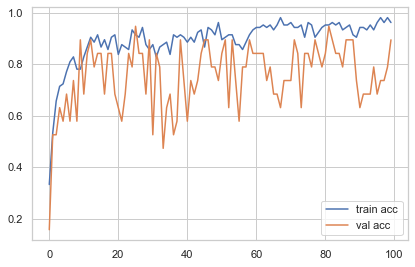

average acc = 0.8944761964678765
average val acc = 0.7536842128634453
max acc = 0.9809523820877075
max val acc = 0.9473684430122375


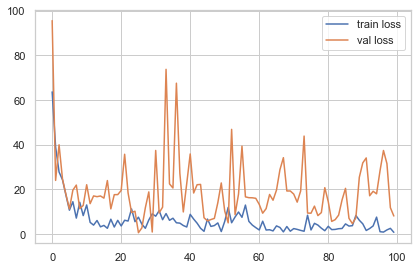

average loss = 6.487122634053231
average val loss = 19.476999318599702
max loss = 63.68088912963867
max val loss = 95.58753967285156


In [20]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta2 = np.mean(history2.history['accuracy'])
print('average acc = {}'.format(ta2))
va2 = np.mean(history2.history['val_accuracy'])
print('average val acc = {}'.format(va2))
ta2a = np.max(history2.history['accuracy'])
print('max acc = {}'.format(ta2a))
va2a = np.max(history2.history['val_accuracy'])
print('max val acc = {}'.format(va2a))

# loss
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl2 = np.mean(history2.history['loss'])
print('average loss = {}'.format(tl2))
vl2 = np.mean(history2.history['val_loss'])
print('average val loss = {}'.format(vl2))
tl2a = np.max(history2.history['loss'])
print('max loss = {}'.format(tl2a))
vl2a = np.max(history2.history['val_loss'])
print('max val loss = {}'.format(vl2a))

In [21]:
score2 = model2.evaluate(x_val2, y_val2,  verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 8.110312461853027
Test accuracy: 0.8947368264198303


In [22]:
Y_pred2 = model2.predict_generator(x_test2)
y_pred2 = np.argmax(Y_pred2, axis=1)
y_test2 = np.argmax(y_test2, axis=1)
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)

[[ 8  3  1  0]
 [ 0  9  0  0]
 [ 4  0  7  0]
 [ 0  0  0 10]]


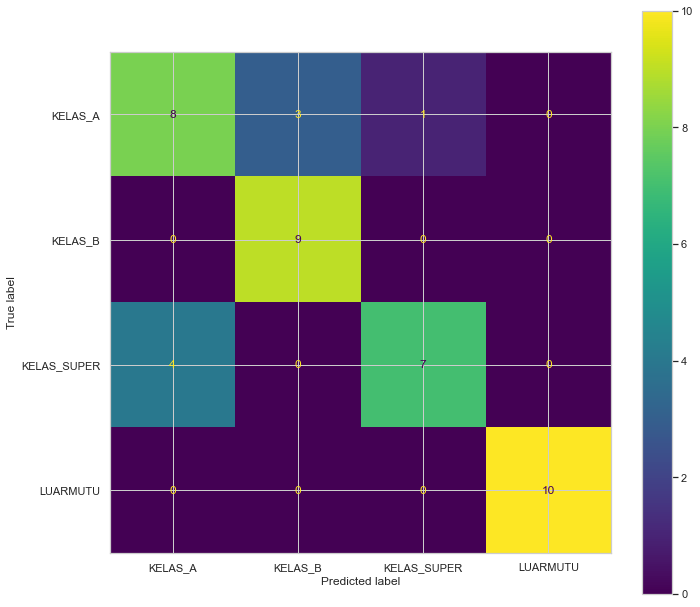

In [23]:
fig,ax= plt.subplots(figsize=(10,10))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test2, y_pred2, ax=ax, display_labels=target_names)
plt.show()

In [24]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test2, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.67      0.67      0.67        12
     KELAS_B       0.75      1.00      0.86         9
 KELAS_SUPER       0.88      0.64      0.74        11
    LUARMUTU       1.00      1.00      1.00        10

    accuracy                           0.81        42
   macro avg       0.82      0.83      0.82        42
weighted avg       0.82      0.81      0.81        42



# ------------------------------------------------------------------------------------------

# Model 3

In [16]:
model3.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history3=model3.fit(datagen.flow(x_train3, y_train3),
            validation_data=(x_val3, y_val3),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 28s 5s/step - loss: 1.5100 - accuracy: 0.4476 - val_loss: 1.3145 - val_accuracy: 0.4737
Epoch 2/100
4/4 [==============================] - 2s 456ms/step - loss: 0.9784 - accuracy: 0.6381 - val_loss: 0.8122 - val_accuracy: 0.6316
Epoch 3/100
4/4 [==============================] - 2s 447ms/step - loss: 0.6286 - accuracy: 0.7619 - val_loss: 0.7702 - val_accuracy: 0.6842
Epoch 4/100
4/4 [==============================] - 2s 458ms/step - loss: 0.6152 - accuracy: 0.7714 - val_loss: 0.9493 - val_accuracy: 0.6316
Epoch 5/100
4/4 [==============================] - 2s 393ms/step - loss: 0.6231 - accuracy: 0.7714 - val_loss: 0.8003 - val_accuracy: 0.5789
Epoch 6/100
4/4 [==============================] - 2s 460ms/step - loss: 0.4786 - accuracy: 0.7619 - val_loss: 1.4114 - val_accuracy: 0.4211
Epoch 7/100
4/4 [==============================] - 2s 547ms/step - loss: 0.6170 - accuracy: 0.7238 - val_loss: 0.7102 - val_accuracy: 0.6316
Epoch 8/100
4/4

Epoch 59/100
4/4 [==============================] - 2s 387ms/step - loss: 0.1390 - accuracy: 0.9238 - val_loss: 0.6686 - val_accuracy: 0.7895
Epoch 60/100
4/4 [==============================] - 2s 390ms/step - loss: 0.0943 - accuracy: 0.9619 - val_loss: 0.5105 - val_accuracy: 0.8421
Epoch 61/100
4/4 [==============================] - 2s 458ms/step - loss: 0.1585 - accuracy: 0.9429 - val_loss: 0.6418 - val_accuracy: 0.7895
Epoch 62/100
4/4 [==============================] - 2s 461ms/step - loss: 0.1558 - accuracy: 0.9429 - val_loss: 0.5160 - val_accuracy: 0.8421
Epoch 63/100
4/4 [==============================] - 2s 462ms/step - loss: 0.0986 - accuracy: 0.9619 - val_loss: 0.5146 - val_accuracy: 0.8421
Epoch 64/100
4/4 [==============================] - 2s 469ms/step - loss: 0.0604 - accuracy: 0.9810 - val_loss: 0.3741 - val_accuracy: 0.8947
Epoch 65/100
4/4 [==============================] - 2s 556ms/step - loss: 0.0856 - accuracy: 0.9619 - val_loss: 0.3544 - val_accuracy: 0.9474
Epoch 

# evaluasi testing dan visualisasi

In [18]:
history3.history

{'loss': [1.5100454092025757,
  0.9783663749694824,
  0.6285858750343323,
  0.615179181098938,
  0.6230672001838684,
  0.4785935878753662,
  0.6169623136520386,
  0.4708182215690613,
  0.48596853017807007,
  0.2560804486274719,
  0.4505089223384857,
  0.31120264530181885,
  0.3454638123512268,
  0.16379782557487488,
  0.30292847752571106,
  0.2118779867887497,
  0.18886132538318634,
  0.24659192562103271,
  0.24524082243442535,
  0.2408657670021057,
  0.26482510566711426,
  0.24279886484146118,
  0.33595606684684753,
  0.2253594547510147,
  0.24144308269023895,
  0.35269609093666077,
  0.2714572846889496,
  0.22423429787158966,
  0.2563014328479767,
  0.2781553268432617,
  0.13623666763305664,
  0.3508622944355011,
  0.22768907248973846,
  0.09174960851669312,
  0.18258249759674072,
  0.23900531232357025,
  0.25080549716949463,
  0.22919927537441254,
  0.19758474826812744,
  0.09265170991420746,
  0.16910776495933533,
  0.08333731442689896,
  0.16508887708187103,
  0.11512234807014465,

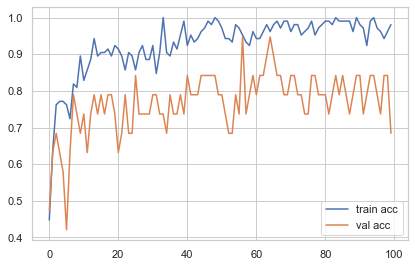

average acc = 0.9269523850083351
average val acc = 0.7684210607409477
max acc = 1.0
max val acc = 0.9473684430122375


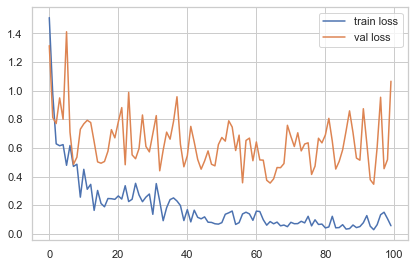

average loss = 0.19361601328477263
average val loss = 0.6428003424406051
max loss = 1.5100454092025757
max val loss = 1.4114233255386353


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history3.history['accuracy'], label='train acc')
plt.plot(history3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta3 = np.mean(history3.history['accuracy'])
print('average acc = {}'.format(ta3))
va3 = np.mean(history3.history['val_accuracy'])
print('average val acc = {}'.format(va3))
ta3a = np.max(history3.history['accuracy'])
print('max acc = {}'.format(ta3a))
va3a = np.max(history3.history['val_accuracy'])
print('max val acc = {}'.format(va3a))


# loss
plt.plot(history3.history['loss'], label='train loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl3 = np.mean(history3.history['loss'])
print('average loss = {}'.format(tl3))
vl3 = np.mean(history3.history['val_loss'])
print('average val loss = {}'.format(vl3))
tl3a = np.max(history3.history['loss'])
print('max loss = {}'.format(tl3a))
vl3a = np.max(history3.history['val_loss'])
print('max val loss = {}'.format(vl3a))

In [20]:
score3 = model3.evaluate(x_val3, y_val3,  verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 1.065771222114563
Test accuracy: 0.6842105388641357


In [21]:
Y_pred3 = model3.predict_generator(x_test3)
y_pred3 = np.argmax(Y_pred3, axis=1)
y_test3 = np.argmax(y_test3, axis=1)
cm3 = confusion_matrix(y_test3, y_pred3)
print(cm3)

[[ 3 11  2  0]
 [ 0  8  0  0]
 [ 0  0  7  0]
 [ 0  1  0 10]]


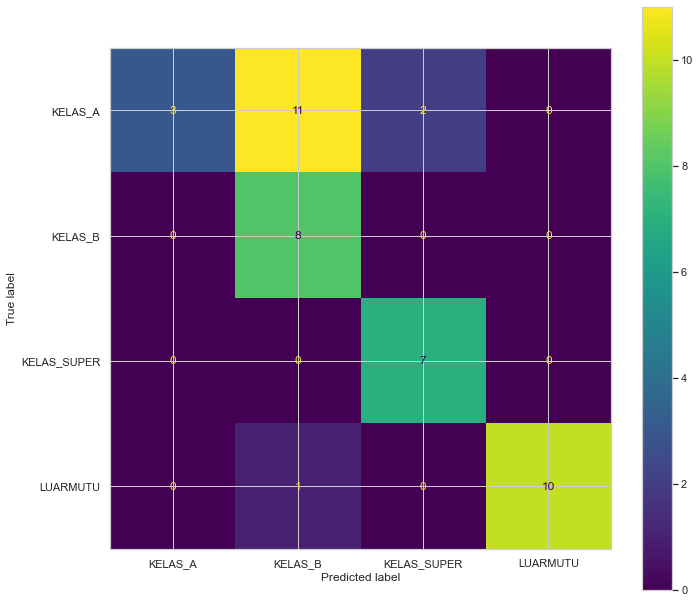

In [22]:
fig,ax= plt.subplots(figsize=(10,10))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test3, y_pred3, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test3, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       1.00      0.19      0.32        16
     KELAS_B       0.40      1.00      0.57         8
 KELAS_SUPER       0.78      1.00      0.88         7
    LUARMUTU       1.00      0.91      0.95        11

    accuracy                           0.67        42
   macro avg       0.79      0.77      0.68        42
weighted avg       0.85      0.67      0.62        42



# --------------------------------------------------------------------------

# Model 4

In [16]:
model4.compile(optimizer=Adam(lr=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history4 = model4.fit(datagen.flow(x_train4, y_train4),
            validation_data=(x_val4, y_val4),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 28s 5s/step - loss: 4.1507 - accuracy: 0.4190 - val_loss: 4.6032 - val_accuracy: 0.2632
Epoch 2/100
4/4 [==============================] - 2s 383ms/step - loss: 2.7129 - accuracy: 0.5238 - val_loss: 3.6502 - val_accuracy: 0.5789
Epoch 3/100
4/4 [==============================] - 2s 560ms/step - loss: 1.9333 - accuracy: 0.6286 - val_loss: 4.1168 - val_accuracy: 0.4211
Epoch 4/100
4/4 [==============================] - 2s 458ms/step - loss: 1.4183 - accuracy: 0.7238 - val_loss: 3.9305 - val_accuracy: 0.4737
Epoch 5/100
4/4 [==============================] - 2s 548ms/step - loss: 0.6374 - accuracy: 0.8286 - val_loss: 4.1740 - val_accuracy: 0.3684
Epoch 6/100
4/4 [==============================] - 2s 463ms/step - loss: 0.9728 - accuracy: 0.8381 - val_loss: 4.1364 - val_accuracy: 0.4737
Epoch 7/100
4/4 [==============================] - 2s 548ms/step - loss: 0.7868 - accuracy: 0.8095 - val_loss: 3.2360 - val_accuracy: 0.5789
Epoch 8/100
4/4

Epoch 59/100
4/4 [==============================] - 2s 394ms/step - loss: 0.2534 - accuracy: 0.9714 - val_loss: 4.1067 - val_accuracy: 0.7895
Epoch 60/100
4/4 [==============================] - 2s 554ms/step - loss: 0.2165 - accuracy: 0.9619 - val_loss: 3.4276 - val_accuracy: 0.7368
Epoch 61/100
4/4 [==============================] - 2s 393ms/step - loss: 0.1827 - accuracy: 0.9619 - val_loss: 3.6813 - val_accuracy: 0.6842
Epoch 62/100
4/4 [==============================] - 2s 470ms/step - loss: 0.2428 - accuracy: 0.9619 - val_loss: 4.3704 - val_accuracy: 0.7895
Epoch 63/100
4/4 [==============================] - 2s 450ms/step - loss: 0.2759 - accuracy: 0.9524 - val_loss: 3.5313 - val_accuracy: 0.6842
Epoch 64/100
4/4 [==============================] - 2s 471ms/step - loss: 0.4858 - accuracy: 0.9333 - val_loss: 3.6176 - val_accuracy: 0.6316
Epoch 65/100
4/4 [==============================] - 2s 398ms/step - loss: 0.4796 - accuracy: 0.9333 - val_loss: 3.7733 - val_accuracy: 0.6842
Epoch 

# evaluasi testing dan visualisasi

In [18]:
history4.history

{'loss': [4.150655746459961,
  2.712925910949707,
  1.9332996606826782,
  1.4183303117752075,
  0.6373694539070129,
  0.972794234752655,
  0.786763072013855,
  0.7804462909698486,
  0.8134036064147949,
  1.0561013221740723,
  1.3579223155975342,
  0.4146774411201477,
  0.30975213646888733,
  0.3600386381149292,
  0.371088445186615,
  0.8219265341758728,
  0.3972083330154419,
  0.6846120357513428,
  0.4520352780818939,
  0.9496945142745972,
  1.3366998434066772,
  0.8045097589492798,
  0.28036975860595703,
  0.5880741477012634,
  0.5957546234130859,
  1.2800613641738892,
  0.8180418610572815,
  0.6785881519317627,
  0.26770928502082825,
  0.8173629641532898,
  0.8131266236305237,
  1.1233789920806885,
  0.9339923858642578,
  1.5277655124664307,
  0.4801400899887085,
  1.0793099403381348,
  0.8288764357566833,
  0.5885162949562073,
  0.4390069842338562,
  0.5751234292984009,
  1.0124731063842773,
  0.7974196076393127,
  1.1431431770324707,
  1.46854829788208,
  0.8589434623718262,
  0.63

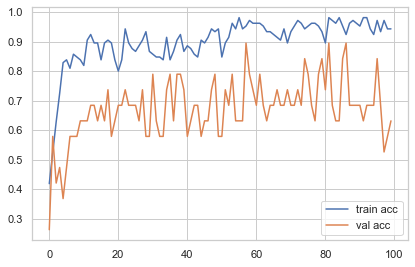

average acc = 0.8996190533041954
average val acc = 0.6721052631735802
max acc = 0.9809523820877075
max val acc = 0.8947368264198303


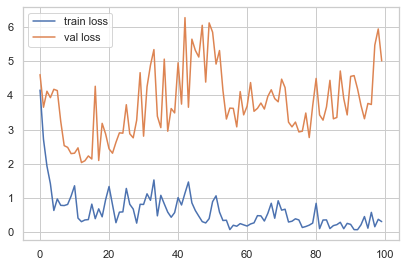

average loss = 0.6246225307136775
average val loss = 3.772789092063904
max loss = 4.150655746459961
max val loss = 6.265710353851318


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history4.history['accuracy'], label='train acc')
plt.plot(history4.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta4 = np.mean(history4.history['accuracy'])
print('average acc = {}'.format(ta4))
va4 = np.mean(history4.history['val_accuracy'])
print('average val acc = {}'.format(va4))
ta4a = np.max(history4.history['accuracy'])
print('max acc = {}'.format(ta4a))
va4a = np.max(history4.history['val_accuracy'])
print('max val acc = {}'.format(va4a))

# loss
plt.plot(history4.history['loss'], label='train loss')
plt.plot(history4.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl4 = np.mean(history4.history['loss'])
print('average loss = {}'.format(tl4))
vl4 = np.mean(history4.history['val_loss'])
print('average val loss = {}'.format(vl4))
tl4a = np.max(history4.history['loss'])
print('max loss = {}'.format(tl4a))
vl4a = np.max(history4.history['val_loss'])
print('max val loss = {}'.format(vl4a))

In [20]:
score4 = model4.evaluate(x_test4, y_test4,  verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 2.440772294998169
Test accuracy: 0.7857142686843872


In [21]:
Y_pred4 = model4.predict_generator(x_test4)
y_pred4 = np.argmax(Y_pred4, axis=1)
y_test4 = np.argmax(y_test4, axis=1)
cm4 = confusion_matrix(y_test4, y_pred4)
print(cm4)


[[ 5  3  0  0]
 [ 4  5  0  1]
 [ 1  0 13  0]
 [ 0  0  0 10]]


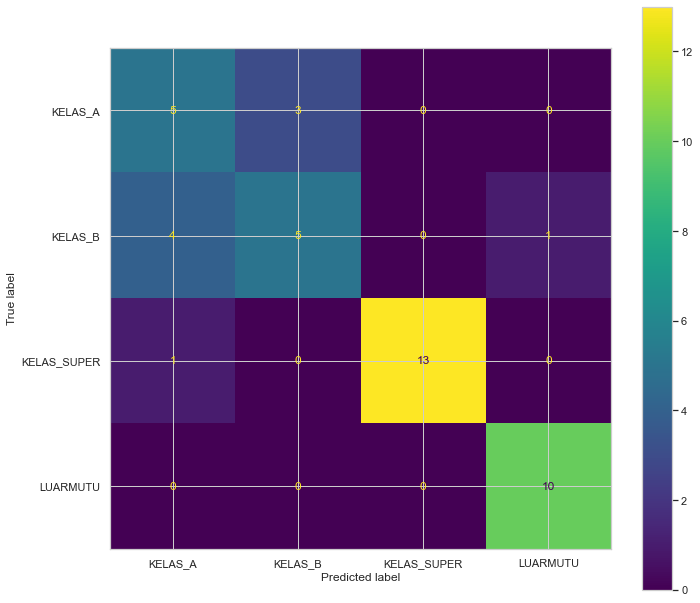

In [22]:
fig,ax= plt.subplots(figsize=(10,10))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test4, y_pred4, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test4, y_pred4, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.50      0.62      0.56         8
     KELAS_B       0.62      0.50      0.56        10
 KELAS_SUPER       1.00      0.93      0.96        14
    LUARMUTU       0.91      1.00      0.95        10

    accuracy                           0.79        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.79      0.79      0.79        42



# -------------------------------------------------------------------------------------

# Model 5

In [16]:
model5.compile(optimizer=Adam(lr=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history5 =model5.fit(datagen.flow(x_train5,y_train5),
            validation_data=(x_val5, y_val5),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 28s 5s/step - loss: 1.5612 - accuracy: 0.2571 - val_loss: 1.5169 - val_accuracy: 0.2105
Epoch 2/100
4/4 [==============================] - 2s 542ms/step - loss: 1.2908 - accuracy: 0.3905 - val_loss: 1.3856 - val_accuracy: 0.3158
Epoch 3/100
4/4 [==============================] - 2s 554ms/step - loss: 1.1793 - accuracy: 0.4667 - val_loss: 1.2737 - val_accuracy: 0.3684
Epoch 4/100
4/4 [==============================] - 2s 455ms/step - loss: 1.0880 - accuracy: 0.5714 - val_loss: 1.1553 - val_accuracy: 0.4737
Epoch 5/100
4/4 [==============================] - 2s 462ms/step - loss: 1.0220 - accuracy: 0.5810 - val_loss: 1.0706 - val_accuracy: 0.5263
Epoch 6/100
4/4 [==============================] - 2s 465ms/step - loss: 0.9555 - accuracy: 0.6095 - val_loss: 1.0330 - val_accuracy: 0.5789
Epoch 7/100
4/4 [==============================] - 2s 379ms/step - loss: 0.9093 - accuracy: 0.6476 - val_loss: 1.0170 - val_accuracy: 0.6842
Epoch 8/100
4/4

Epoch 59/100
4/4 [==============================] - 2s 388ms/step - loss: 0.2925 - accuracy: 0.9048 - val_loss: 0.7150 - val_accuracy: 0.7368
Epoch 60/100
4/4 [==============================] - 2s 464ms/step - loss: 0.2867 - accuracy: 0.9143 - val_loss: 0.7383 - val_accuracy: 0.6842
Epoch 61/100
4/4 [==============================] - 2s 465ms/step - loss: 0.2929 - accuracy: 0.8857 - val_loss: 0.7191 - val_accuracy: 0.7368
Epoch 62/100
4/4 [==============================] - 2s 461ms/step - loss: 0.2943 - accuracy: 0.8762 - val_loss: 0.7081 - val_accuracy: 0.6842
Epoch 63/100
4/4 [==============================] - 2s 467ms/step - loss: 0.2712 - accuracy: 0.9143 - val_loss: 0.7058 - val_accuracy: 0.6842
Epoch 64/100
4/4 [==============================] - 2s 465ms/step - loss: 0.2846 - accuracy: 0.9238 - val_loss: 0.6959 - val_accuracy: 0.6842
Epoch 65/100
4/4 [==============================] - 2s 463ms/step - loss: 0.2640 - accuracy: 0.9333 - val_loss: 0.6995 - val_accuracy: 0.7368
Epoch 

# evaluasi testing dan visualisasi

In [18]:
history5.history

{'loss': [1.5612022876739502,
  1.2908178567886353,
  1.179301381111145,
  1.0880334377288818,
  1.0220470428466797,
  0.9555400013923645,
  0.9093053936958313,
  0.7751007080078125,
  0.7793665528297424,
  0.722274124622345,
  0.726732075214386,
  0.6762666702270508,
  0.6762513518333435,
  0.6506904363632202,
  0.6254917979240417,
  0.6425808072090149,
  0.5472277402877808,
  0.5695781111717224,
  0.5691202878952026,
  0.4954816401004791,
  0.5282952189445496,
  0.5161185264587402,
  0.48380663990974426,
  0.4820677936077118,
  0.437918096780777,
  0.4676906168460846,
  0.4008445739746094,
  0.404339462518692,
  0.43676847219467163,
  0.4829118251800537,
  0.42653509974479675,
  0.4088209867477417,
  0.4200678765773773,
  0.36941564083099365,
  0.40918219089508057,
  0.35727012157440186,
  0.33884450793266296,
  0.43670836091041565,
  0.36090171337127686,
  0.3736390471458435,
  0.37353280186653137,
  0.3544706106185913,
  0.34423181414604187,
  0.31419792771339417,
  0.3705492019653

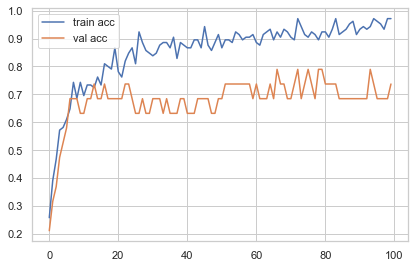

average acc = 0.8545714363455772
average val acc = 0.6794736859202385
max acc = 0.9714285731315613
max val acc = 0.7894737124443054


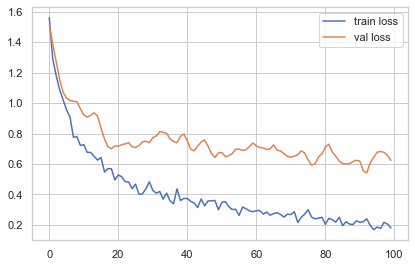

average loss = 0.41093604192137717
average val loss = 0.7492818647623062
max loss = 1.5612022876739502
max val loss = 1.516924262046814


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history5.history['accuracy'], label='train acc')
plt.plot(history5.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta5 = np.mean(history5.history['accuracy'])
print('average acc = {}'.format(ta5))
va5 = np.mean(history5.history['val_accuracy'])
print('average val acc = {}'.format(va5))
ta5a = np.max(history5.history['accuracy'])
print('max acc = {}'.format(ta5a))
va5a = np.max(history5.history['val_accuracy'])
print('max val acc = {}'.format(va5a))

# loss
plt.plot(history5.history['loss'], label='train loss')
plt.plot(history5.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl5 = np.mean(history5.history['loss'])
print('average loss = {}'.format(tl5))
vl5 = np.mean(history5.history['val_loss'])
print('average val loss = {}'.format(vl5))
tl5a = np.max(history5.history['loss'])
print('max loss = {}'.format(tl5a))
vl5a = np.max(history5.history['val_loss'])
print('max val loss = {}'.format(vl5a))

In [20]:
score5 = model5.evaluate(x_val5, y_val5,  verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Test loss: 0.623424232006073
Test accuracy: 0.7368420958518982


In [21]:
Y_pred5 = model5.predict_generator(x_test5)
y_pred5 = np.argmax(Y_pred5, axis=1)
y_test5 = np.argmax(y_test5, axis=1)
cm5 = confusion_matrix(y_test5, y_pred5)
print(cm5)

[[7 4 1 0]
 [0 9 0 0]
 [4 0 9 0]
 [0 0 0 8]]


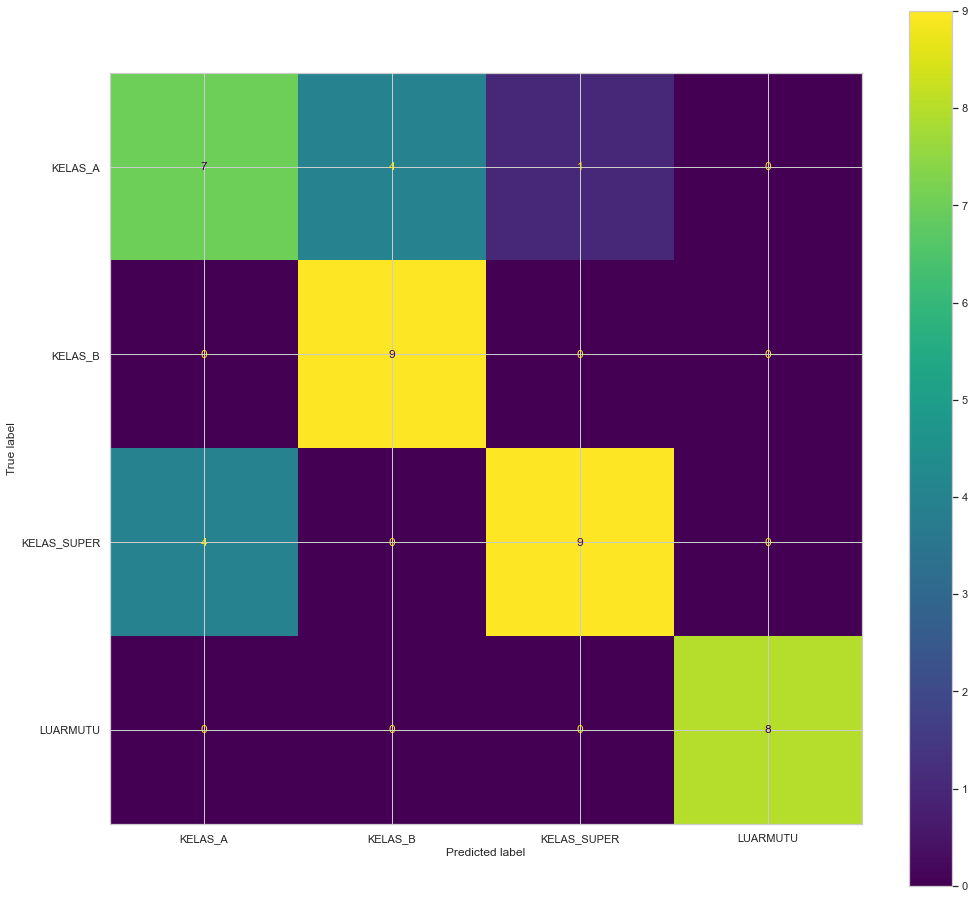

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test5, y_pred5, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test5, y_pred5, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.64      0.58      0.61        12
     KELAS_B       0.69      1.00      0.82         9
 KELAS_SUPER       0.90      0.69      0.78        13
    LUARMUTU       1.00      1.00      1.00         8

    accuracy                           0.79        42
   macro avg       0.81      0.82      0.80        42
weighted avg       0.80      0.79      0.78        42



# ------------------------------------------------------------------------

# Model 6

In [16]:
model6.compile(optimizer=Adam(lr=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history6 =model6.fit(datagen.flow(x_train6,y_train6),
            validation_data=(x_val6, y_val6),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 28s 5s/step - loss: 1.4668 - accuracy: 0.3429 - val_loss: 1.1047 - val_accuracy: 0.4737
Epoch 2/100
4/4 [==============================] - 2s 383ms/step - loss: 0.9680 - accuracy: 0.5905 - val_loss: 1.3803 - val_accuracy: 0.4737
Epoch 3/100
4/4 [==============================] - 2s 389ms/step - loss: 1.0438 - accuracy: 0.6000 - val_loss: 0.9306 - val_accuracy: 0.6316
Epoch 4/100
4/4 [==============================] - 2s 456ms/step - loss: 0.7573 - accuracy: 0.6286 - val_loss: 0.7754 - val_accuracy: 0.5263
Epoch 5/100
4/4 [==============================] - 2s 458ms/step - loss: 0.6896 - accuracy: 0.6762 - val_loss: 0.5247 - val_accuracy: 0.8421
Epoch 6/100
4/4 [==============================] - 2s 382ms/step - loss: 0.5680 - accuracy: 0.7810 - val_loss: 0.4934 - val_accuracy: 0.7895
Epoch 7/100
4/4 [==============================] - 2s 456ms/step - loss: 0.5250 - accuracy: 0.8000 - val_loss: 0.4440 - val_accuracy: 0.7895
Epoch 8/100
4/4

Epoch 59/100
4/4 [==============================] - 2s 390ms/step - loss: 0.1697 - accuracy: 0.9524 - val_loss: 0.4353 - val_accuracy: 0.8947
Epoch 60/100
4/4 [==============================] - 2s 382ms/step - loss: 0.1331 - accuracy: 0.9524 - val_loss: 0.6123 - val_accuracy: 0.8421
Epoch 61/100
4/4 [==============================] - 2s 457ms/step - loss: 0.1526 - accuracy: 0.9524 - val_loss: 0.4061 - val_accuracy: 0.8947
Epoch 62/100
4/4 [==============================] - 2s 461ms/step - loss: 0.1275 - accuracy: 0.9714 - val_loss: 0.3489 - val_accuracy: 0.7895
Epoch 63/100
4/4 [==============================] - 2s 552ms/step - loss: 0.0876 - accuracy: 0.9905 - val_loss: 0.3500 - val_accuracy: 0.8421
Epoch 64/100
4/4 [==============================] - 2s 556ms/step - loss: 0.1287 - accuracy: 0.9524 - val_loss: 0.3871 - val_accuracy: 0.8947
Epoch 65/100
4/4 [==============================] - 2s 463ms/step - loss: 0.1559 - accuracy: 0.9524 - val_loss: 0.3233 - val_accuracy: 0.8947
Epoch 

# evaluasi testing dan visualisasi

In [18]:
history6.history

{'loss': [1.4668402671813965,
  0.9679631590843201,
  1.0438117980957031,
  0.7573407888412476,
  0.6895748972892761,
  0.5679758191108704,
  0.524982213973999,
  0.4446389079093933,
  0.46566319465637207,
  0.41223013401031494,
  0.44262275099754333,
  0.43266361951828003,
  0.3786284625530243,
  0.40243983268737793,
  0.4040951728820801,
  0.31854259967803955,
  0.3550739884376526,
  0.2945114076137543,
  0.28990086913108826,
  0.2798483967781067,
  0.2253950536251068,
  0.2985275983810425,
  0.2783292233943939,
  0.26884159445762634,
  0.2692226469516754,
  0.23573367297649384,
  0.20979690551757812,
  0.2402232587337494,
  0.2521408498287201,
  0.28603145480155945,
  0.24855317175388336,
  0.2505177855491638,
  0.21182049810886383,
  0.21727722883224487,
  0.2193872034549713,
  0.17691919207572937,
  0.2113567590713501,
  0.18471769988536835,
  0.20107460021972656,
  0.2178657352924347,
  0.1807309091091156,
  0.16987286508083344,
  0.16933630406856537,
  0.17037026584148407,
  0.2

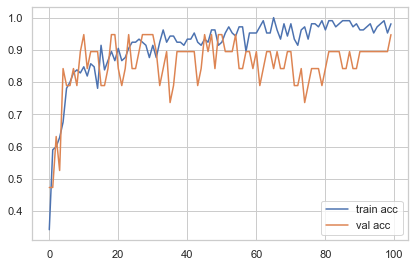

average acc = 0.9136190524697304
average val acc = 0.8552631604671478
max acc = 1.0
max val acc = 0.9473684430122375


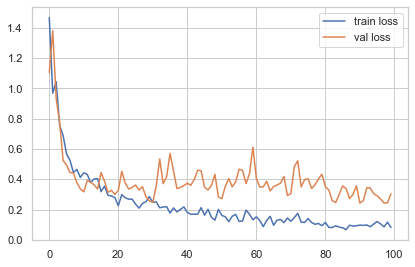

average loss = 0.23294647209346295
average val loss = 0.39277771770954134
max loss = 1.4668402671813965
max val loss = 1.3802573680877686


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history6.history['accuracy'], label='train acc')
plt.plot(history6.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta6 = np.mean(history6.history['accuracy'])
print('average acc = {}'.format(ta6))
va6 = np.mean(history6.history['val_accuracy'])
print('average val acc = {}'.format(va6))
ta6a = np.max(history6.history['accuracy'])
print('max acc = {}'.format(ta6a))
va6a = np.max(history6.history['val_accuracy'])
print('max val acc = {}'.format(va6a))

# loss
plt.plot(history6.history['loss'], label='train loss')
plt.plot(history6.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl6 = np.mean(history6.history['loss'])
print('average loss = {}'.format(tl6))
vl6 = np.mean(history6.history['val_loss'])
print('average val loss = {}'.format(vl6))
tl6a = np.max(history6.history['loss'])
print('max loss = {}'.format(tl6a))
vl6a = np.max(history6.history['val_loss'])
print('max val loss = {}'.format(vl6a))

In [20]:
score6 = model6.evaluate(x_test6, y_test6,  verbose=0)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

Test loss: 0.4447634518146515
Test accuracy: 0.8333333134651184


In [21]:
Y_pred6 = model6.predict_generator(x_test6)
y_pred6 = np.argmax(Y_pred6, axis=1)
y_test6 = np.argmax(y_test6, axis=1)
cm6 = confusion_matrix(y_test6, y_pred6)
print(cm6)

[[ 3  2  3  0]
 [ 0  6  0  0]
 [ 1  0 11  0]
 [ 0  1  0 15]]


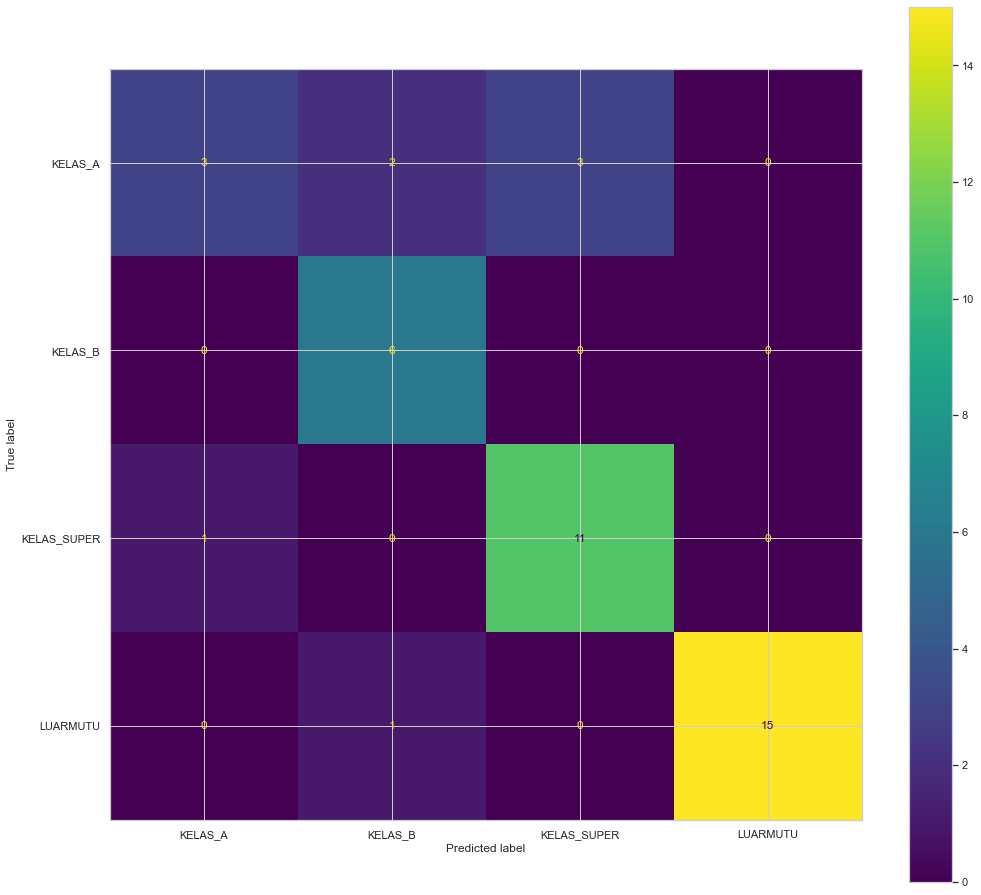

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test6, y_pred6, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test6, y_pred6, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.75      0.38      0.50         8
     KELAS_B       0.67      1.00      0.80         6
 KELAS_SUPER       0.79      0.92      0.85        12
    LUARMUTU       1.00      0.94      0.97        16

    accuracy                           0.83        42
   macro avg       0.80      0.81      0.78        42
weighted avg       0.84      0.83      0.82        42



# ---------------------------------------------------------------------------------------------------------------

# ---------- Skenario ke 1 epochs 200 dan learning rate 0.001-0.00005 -----------

# Model 7

# Training

In [16]:
model7.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history7 = model7.fit(datagen.flow(x_train7, y_train7),
            validation_data=(x_val7, y_val7),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 28s 6s/step - loss: 15.9438 - accuracy: 0.3333 - val_loss: 5.1298 - val_accuracy: 0.6316
Epoch 2/200
4/4 [==============================] - 2s 378ms/step - loss: 14.2539 - accuracy: 0.5143 - val_loss: 7.3230 - val_accuracy: 0.6316
Epoch 3/200
4/4 [==============================] - 2s 459ms/step - loss: 5.2012 - accuracy: 0.5619 - val_loss: 3.9980 - val_accuracy: 0.5789
Epoch 4/200
4/4 [==============================] - 2s 451ms/step - loss: 3.6086 - accuracy: 0.6571 - val_loss: 2.6177 - val_accuracy: 0.6842
Epoch 5/200
4/4 [==============================] - 2s 385ms/step - loss: 2.2684 - accuracy: 0.7905 - val_loss: 1.8037 - val_accuracy: 0.7368
Epoch 6/200
4/4 [==============================] - 2s 464ms/step - loss: 1.1740 - accuracy: 0.8190 - val_loss: 2.5463 - val_accuracy: 0.6842
Epoch 7/200
4/4 [==============================] - 2s 549ms/step - loss: 1.4551 - accuracy: 0.8190 - val_loss: 0.9093 - val_accuracy: 0.7895
Epoch 8/200
4

Epoch 59/200
4/4 [==============================] - 2s 470ms/step - loss: 0.2812 - accuracy: 0.9524 - val_loss: 2.3576 - val_accuracy: 0.7368
Epoch 60/200
4/4 [==============================] - 2s 467ms/step - loss: 1.0527 - accuracy: 0.9143 - val_loss: 3.6331 - val_accuracy: 0.6842
Epoch 61/200
4/4 [==============================] - 2s 461ms/step - loss: 0.8289 - accuracy: 0.9429 - val_loss: 1.8421 - val_accuracy: 0.6842
Epoch 62/200
4/4 [==============================] - 2s 386ms/step - loss: 0.2932 - accuracy: 0.9619 - val_loss: 2.4643 - val_accuracy: 0.8947
Epoch 63/200
4/4 [==============================] - 2s 448ms/step - loss: 0.8198 - accuracy: 0.9048 - val_loss: 2.1752 - val_accuracy: 0.8947
Epoch 64/200
4/4 [==============================] - 2s 385ms/step - loss: 0.2763 - accuracy: 0.9714 - val_loss: 1.6971 - val_accuracy: 0.8421
Epoch 65/200
4/4 [==============================] - 2s 470ms/step - loss: 0.9823 - accuracy: 0.9333 - val_loss: 1.1390 - val_accuracy: 0.9474
Epoch 

4/4 [==============================] - 2s 555ms/step - loss: 0.4025 - accuracy: 0.9524 - val_loss: 2.1920 - val_accuracy: 0.9474
Epoch 174/200
4/4 [==============================] - 2s 463ms/step - loss: 1.0903 - accuracy: 0.9333 - val_loss: 1.6986 - val_accuracy: 0.8947
Epoch 175/200
4/4 [==============================] - 2s 556ms/step - loss: 0.2253 - accuracy: 0.9619 - val_loss: 5.4850 - val_accuracy: 0.7895
Epoch 176/200
4/4 [==============================] - 2s 463ms/step - loss: 0.6449 - accuracy: 0.9524 - val_loss: 3.8984 - val_accuracy: 0.7895
Epoch 177/200
4/4 [==============================] - 2s 382ms/step - loss: 0.1253 - accuracy: 0.9714 - val_loss: 1.2085 - val_accuracy: 0.8421
Epoch 178/200
4/4 [==============================] - 2s 474ms/step - loss: 0.1862 - accuracy: 0.9619 - val_loss: 1.3642 - val_accuracy: 0.8421
Epoch 179/200
4/4 [==============================] - 2s 458ms/step - loss: 0.1055 - accuracy: 0.9810 - val_loss: 0.8566 - val_accuracy: 0.9474
Epoch 180/200

# evaluasi, testing dan visualisasi

In [18]:
history7.history

{'loss': [15.943805694580078,
  14.253905296325684,
  5.201226711273193,
  3.608569860458374,
  2.2683985233306885,
  1.1740169525146484,
  1.455077052116394,
  1.8205406665802002,
  1.585020661354065,
  0.917271614074707,
  1.0155912637710571,
  1.7187145948410034,
  1.2456271648406982,
  0.8048531413078308,
  1.26271390914917,
  0.4413644075393677,
  0.5696378946304321,
  1.0505123138427734,
  1.9024890661239624,
  1.2741316556930542,
  2.2422380447387695,
  2.354778289794922,
  1.7148059606552124,
  0.968246579170227,
  0.8795710206031799,
  0.7811911702156067,
  0.6976858973503113,
  0.33544695377349854,
  0.7272100448608398,
  0.6524192690849304,
  0.6199484467506409,
  0.6551040410995483,
  0.7224858403205872,
  0.5656700730323792,
  1.099071741104126,
  0.563309907913208,
  0.6179779767990112,
  1.0210217237472534,
  1.6624953746795654,
  0.8503455519676208,
  1.6364003419876099,
  1.3984191417694092,
  1.9657750129699707,
  0.6293143630027771,
  0.24186211824417114,
  1.2551304

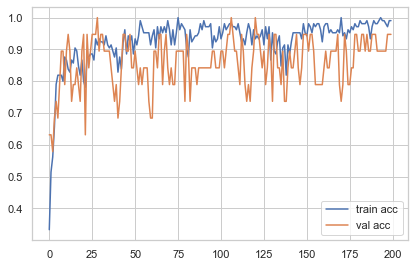

average acc = 0.927428575605154
average val acc = 0.8586842155456543
max acc = 1.0
max val acc = 1.0


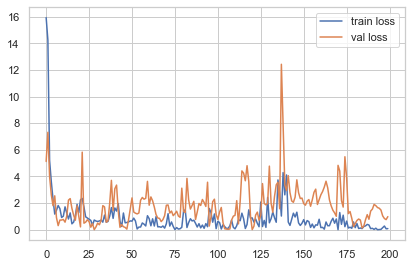

average loss = 0.8914426476476279
average val loss = 1.8458277989881753
max loss = 15.943805694580078
max val loss = 12.436655044555664


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history7.history['accuracy'], label='train acc')
plt.plot(history7.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta7 = np.mean(history7.history['accuracy'])
print('average acc = {}'.format(ta7))
va7 = np.mean(history7.history['val_accuracy'])
print('average val acc = {}'.format(va7))
ta7a = np.max(history7.history['accuracy'])
print('max acc = {}'.format(ta7a))
va7a = np.max(history7.history['val_accuracy'])
print('max val acc = {}'.format(va7a))

# loss
plt.plot(history7.history['loss'], label='train loss')
plt.plot(history7.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl7 = np.mean(history7.history['loss'])
print('average loss = {}'.format(tl7))
vl7 = np.mean(history7.history['val_loss'])
print('average val loss = {}'.format(vl7))
tl7a = np.max(history7.history['loss'])
print('max loss = {}'.format(tl7a))
vl7a = np.max(history7.history['val_loss'])
print('max val loss = {}'.format(vl7a))

In [20]:
score7 = model7.evaluate(x_test7, y_test7,  verbose=0)
print('Test loss:', score7[0])
print('Test accuracy:', score7[1])

Test loss: 4.589263916015625
Test accuracy: 0.8571428656578064


In [21]:
Y_pred7 = model7.predict_generator(x_test7)
y_pred7 = np.argmax(Y_pred7, axis=1)
y_test7 = np.argmax(y_test7, axis=1)
cm7 = confusion_matrix(y_test7, y_pred7)
print(cm7)

[[ 6  4  1  0]
 [ 0 12  0  0]
 [ 0  0 10  0]
 [ 0  1  0  8]]


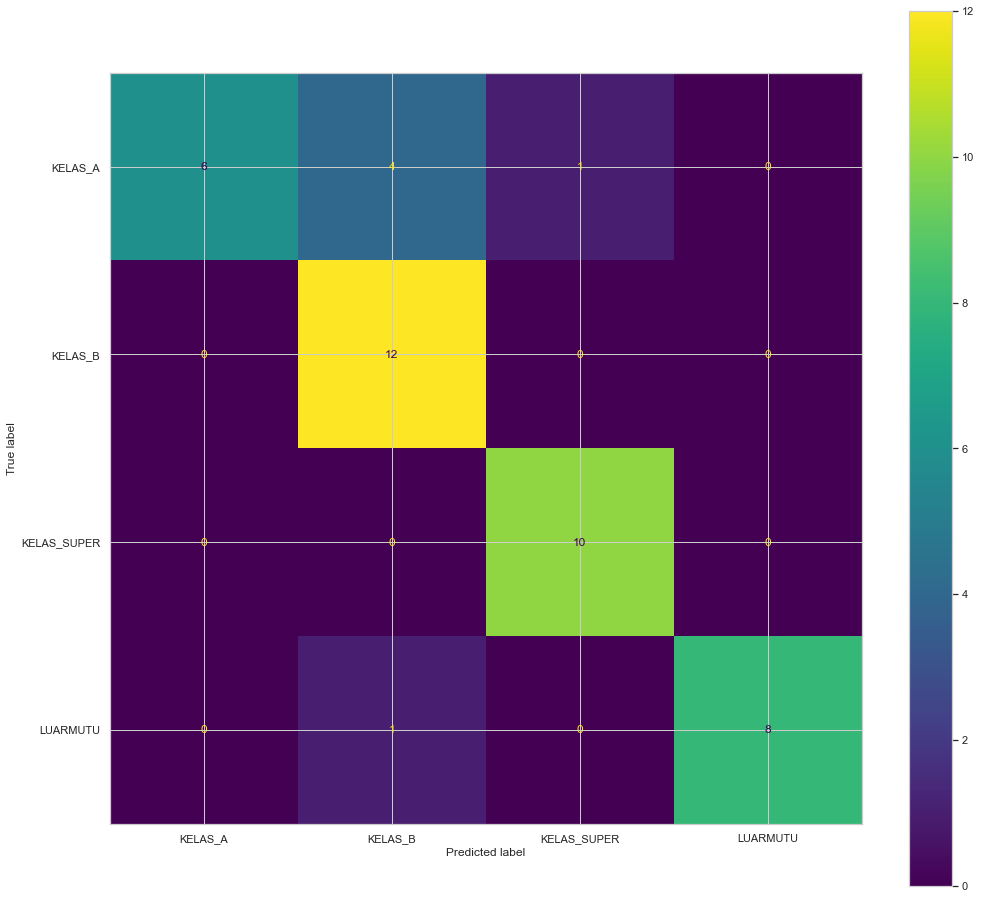

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test7, y_pred7, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test7, y_pred7, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       1.00      0.55      0.71        11
     KELAS_B       0.71      1.00      0.83        12
 KELAS_SUPER       0.91      1.00      0.95        10
    LUARMUTU       1.00      0.89      0.94         9

    accuracy                           0.86        42
   macro avg       0.90      0.86      0.86        42
weighted avg       0.89      0.86      0.85        42



# -----------------------------------------

# Model 8

# Training

In [16]:
model8.compile(optimizer=Adam(lr=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history8 =model8.fit(datagen.flow(x_train8, y_train8),
            validation_data=(x_val8, y_val8),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 28s 6s/step - loss: 60.1038 - accuracy: 0.3714 - val_loss: 85.6039 - val_accuracy: 0.3158
Epoch 2/200
4/4 [==============================] - 2s 451ms/step - loss: 48.6979 - accuracy: 0.4952 - val_loss: 24.3113 - val_accuracy: 0.6316
Epoch 3/200
4/4 [==============================] - 2s 467ms/step - loss: 21.4762 - accuracy: 0.6286 - val_loss: 21.6801 - val_accuracy: 0.6842
Epoch 4/200
4/4 [==============================] - 2s 386ms/step - loss: 28.3752 - accuracy: 0.6476 - val_loss: 18.2916 - val_accuracy: 0.6842
Epoch 5/200
4/4 [==============================] - 2s 386ms/step - loss: 15.1590 - accuracy: 0.7619 - val_loss: 30.8698 - val_accuracy: 0.6842
Epoch 6/200
4/4 [==============================] - 2s 557ms/step - loss: 12.7037 - accuracy: 0.8000 - val_loss: 18.6834 - val_accuracy: 0.7895
Epoch 7/200
4/4 [==============================] - 2s 448ms/step - loss: 10.1992 - accuracy: 0.7714 - val_loss: 20.4605 - val_accuracy: 0.6842
E

4/4 [==============================] - 2s 463ms/step - loss: 4.7206 - accuracy: 0.9429 - val_loss: 11.0907 - val_accuracy: 0.8421
Epoch 116/200
4/4 [==============================] - 2s 463ms/step - loss: 6.2772 - accuracy: 0.8952 - val_loss: 8.2332 - val_accuracy: 0.8947
Epoch 117/200
4/4 [==============================] - 2s 470ms/step - loss: 4.7216 - accuracy: 0.9238 - val_loss: 5.9351 - val_accuracy: 0.7895
Epoch 118/200
4/4 [==============================] - 2s 464ms/step - loss: 1.3022 - accuracy: 0.9619 - val_loss: 12.3863 - val_accuracy: 0.8947
Epoch 119/200
4/4 [==============================] - 2s 467ms/step - loss: 2.7717 - accuracy: 0.9619 - val_loss: 9.4655 - val_accuracy: 0.8947
Epoch 120/200
4/4 [==============================] - 2s 468ms/step - loss: 5.7333e-07 - accuracy: 1.0000 - val_loss: 6.6789 - val_accuracy: 0.8947
Epoch 121/200
4/4 [==============================] - 2s 390ms/step - loss: 1.4597 - accuracy: 0.9524 - val_loss: 5.4193 - val_accuracy: 0.8947
Epoch 1

4/4 [==============================] - 2s 565ms/step - loss: 0.1787 - accuracy: 0.9810 - val_loss: 20.1695 - val_accuracy: 0.8421
Epoch 173/200
4/4 [==============================] - 2s 509ms/step - loss: 2.5942 - accuracy: 0.9619 - val_loss: 18.9652 - val_accuracy: 0.8421
Epoch 174/200
4/4 [==============================] - 2s 466ms/step - loss: 0.6095 - accuracy: 0.9714 - val_loss: 16.2287 - val_accuracy: 0.8421
Epoch 175/200
4/4 [==============================] - 2s 460ms/step - loss: 3.9016 - accuracy: 0.9429 - val_loss: 10.8445 - val_accuracy: 0.7895
Epoch 176/200
4/4 [==============================] - 2s 561ms/step - loss: 1.0425 - accuracy: 0.9619 - val_loss: 14.7502 - val_accuracy: 0.8421
Epoch 177/200
4/4 [==============================] - 2s 393ms/step - loss: 1.2337 - accuracy: 0.9714 - val_loss: 26.6786 - val_accuracy: 0.7895
Epoch 178/200
4/4 [==============================] - 2s 388ms/step - loss: 1.3860 - accuracy: 0.9810 - val_loss: 26.0474 - val_accuracy: 0.7895
Epoch 

# evaluasi, testing dan visualisasi

In [18]:
history8.history

{'loss': [60.1037712097168,
  48.6978874206543,
  21.476167678833008,
  28.375242233276367,
  15.158971786499023,
  12.703680992126465,
  10.199228286743164,
  7.760458469390869,
  12.61042594909668,
  12.136099815368652,
  6.6104888916015625,
  9.45211410522461,
  11.73298454284668,
  7.47217321395874,
  14.409088134765625,
  13.058236122131348,
  7.324889659881592,
  13.264948844909668,
  7.372775554656982,
  9.268370628356934,
  7.039764881134033,
  4.249701023101807,
  3.314650774002075,
  9.904948234558105,
  5.138698577880859,
  6.818276882171631,
  4.956248760223389,
  4.089690685272217,
  3.568087339401245,
  4.2402825355529785,
  4.19130277633667,
  2.5771217346191406,
  3.343500852584839,
  4.902937412261963,
  4.0364813804626465,
  4.822080612182617,
  4.987705707550049,
  3.6515703201293945,
  6.535888671875,
  7.185873031616211,
  8.023025512695312,
  3.299009084701538,
  10.635767936706543,
  3.254904270172119,
  6.843503475189209,
  5.989719867706299,
  6.178540229797363

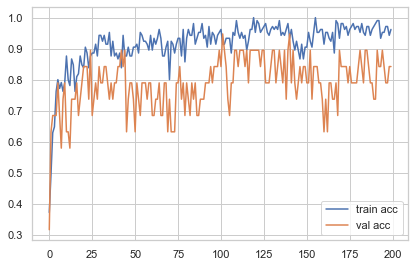

average acc = 0.916000004708767
average val acc = 0.787894742488861
max acc = 1.0
max val acc = 0.9473684430122375


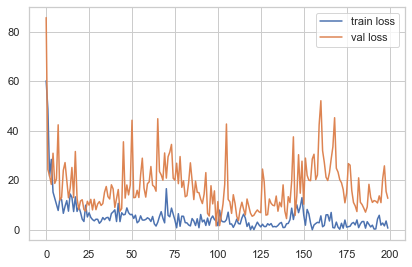

average loss = 5.0575490229185895
average val loss = 17.192635276317596
max loss = 60.1037712097168
max val loss = 85.60394287109375


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history8.history['accuracy'], label='train acc')
plt.plot(history8.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta8 = np.mean(history8.history['accuracy'])
print('average acc = {}'.format(ta8))
va8 = np.mean(history8.history['val_accuracy'])
print('average val acc = {}'.format(va8))
ta8a = np.max(history8.history['accuracy'])
print('max acc = {}'.format(ta8a))
va8a = np.max(history8.history['val_accuracy'])
print('max val acc = {}'.format(va8a))


# loss
plt.plot(history8.history['loss'], label='train loss')
plt.plot(history8.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl8 = np.mean(history8.history['loss'])
print('average loss = {}'.format(tl8))
vl8 = np.mean(history8.history['val_loss'])
print('average val loss = {}'.format(vl8))
tl8a = np.max(history8.history['loss'])
print('max loss = {}'.format(tl8a))
vl8a = np.max(history8.history['val_loss'])
print('max val loss = {}'.format(vl8a))

In [20]:
score8 = model8.evaluate(x_test8, y_test8,  verbose=0)
print('Test loss:', score8[0])
print('Test accuracy:', score8[1])

Test loss: 8.049893379211426
Test accuracy: 0.9047619104385376


In [21]:
Y_pred8 = model8.predict_generator(x_test8)
y_pred8 = np.argmax(Y_pred8, axis=1)
y_test8 = np.argmax(y_test8, axis=1)
cm8 = confusion_matrix(y_test8, y_pred8)
print(cm8)

[[ 6  2  1  0]
 [ 0  9  0  0]
 [ 1  0 11  0]
 [ 0  0  0 12]]


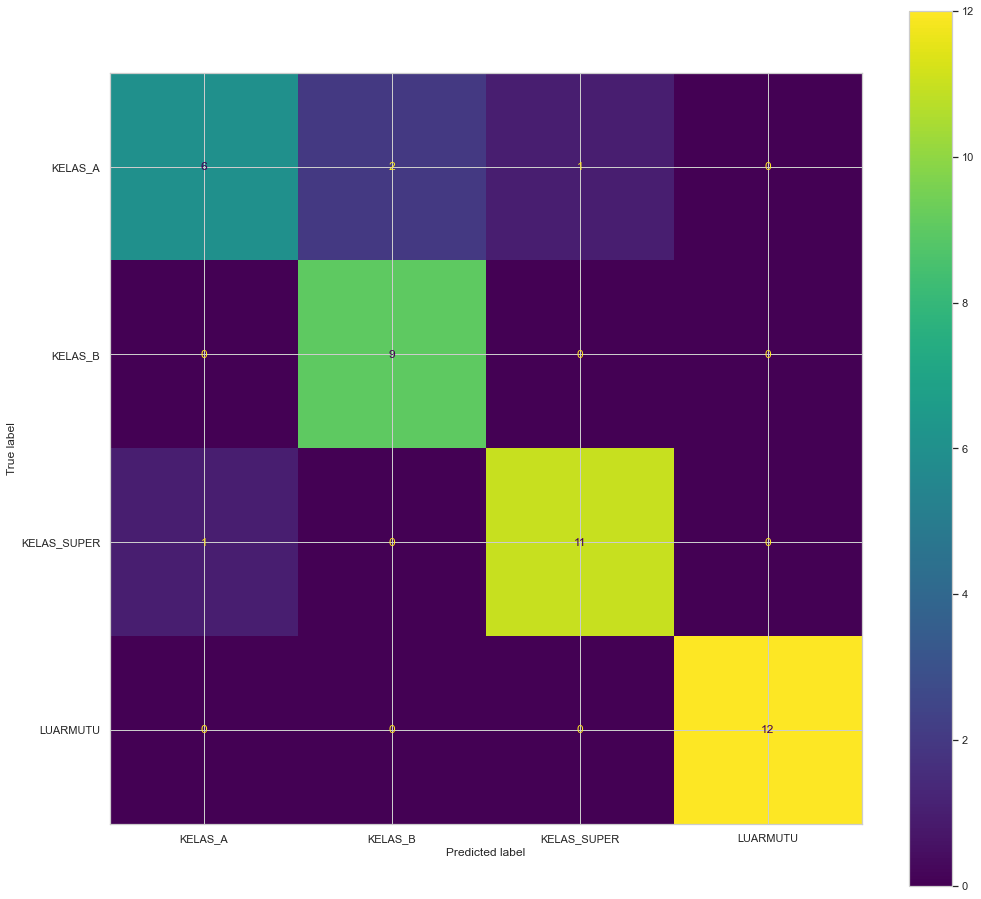

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test8, y_pred8, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test8, y_pred8, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.86      0.67      0.75         9
     KELAS_B       0.82      1.00      0.90         9
 KELAS_SUPER       0.92      0.92      0.92        12
    LUARMUTU       1.00      1.00      1.00        12

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.89        42
weighted avg       0.91      0.90      0.90        42



# ---------------------------------------------------------

# Model 9

# Training

In [16]:
model9.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history9 = model9.fit(datagen.flow(x_train9, y_train9),
            validation_data=(x_val9, y_val9),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 28s 5s/step - loss: 2.1128 - accuracy: 0.2667 - val_loss: 1.2103 - val_accuracy: 0.3684
Epoch 2/200
4/4 [==============================] - 2s 389ms/step - loss: 1.5146 - accuracy: 0.4286 - val_loss: 0.6078 - val_accuracy: 0.7368
Epoch 3/200
4/4 [==============================] - 2s 465ms/step - loss: 0.8399 - accuracy: 0.6857 - val_loss: 1.3002 - val_accuracy: 0.6316
Epoch 4/200
4/4 [==============================] - 2s 450ms/step - loss: 0.9032 - accuracy: 0.6476 - val_loss: 0.4226 - val_accuracy: 0.8421
Epoch 5/200
4/4 [==============================] - 2s 552ms/step - loss: 0.6631 - accuracy: 0.7048 - val_loss: 0.4071 - val_accuracy: 0.8421
Epoch 6/200
4/4 [==============================] - 2s 460ms/step - loss: 0.5953 - accuracy: 0.7333 - val_loss: 0.6607 - val_accuracy: 0.6842
Epoch 7/200
4/4 [==============================] - 2s 451ms/step - loss: 0.5433 - accuracy: 0.8000 - val_loss: 0.4547 - val_accuracy: 0.8947
Epoch 8/200
4/4

Epoch 59/200
4/4 [==============================] - 2s 465ms/step - loss: 0.1720 - accuracy: 0.9238 - val_loss: 0.3136 - val_accuracy: 0.7895
Epoch 60/200
4/4 [==============================] - 2s 387ms/step - loss: 0.1367 - accuracy: 0.9333 - val_loss: 0.3387 - val_accuracy: 0.7368
Epoch 61/200
4/4 [==============================] - 2s 472ms/step - loss: 0.1304 - accuracy: 0.9524 - val_loss: 0.3137 - val_accuracy: 0.7895
Epoch 62/200
4/4 [==============================] - 2s 559ms/step - loss: 0.1448 - accuracy: 0.9619 - val_loss: 0.3546 - val_accuracy: 0.8421
Epoch 63/200
4/4 [==============================] - 2s 557ms/step - loss: 0.1117 - accuracy: 0.9524 - val_loss: 0.2495 - val_accuracy: 0.8421
Epoch 64/200
4/4 [==============================] - 2s 472ms/step - loss: 0.1228 - accuracy: 0.9524 - val_loss: 0.2358 - val_accuracy: 0.8421
Epoch 65/200
4/4 [==============================] - 2s 550ms/step - loss: 0.1258 - accuracy: 0.9619 - val_loss: 0.2240 - val_accuracy: 0.8421
Epoch 

4/4 [==============================] - 2s 476ms/step - loss: 0.0474 - accuracy: 0.9810 - val_loss: 0.3528 - val_accuracy: 0.8421
Epoch 174/200
4/4 [==============================] - 2s 471ms/step - loss: 0.0353 - accuracy: 0.9905 - val_loss: 0.3822 - val_accuracy: 0.8421
Epoch 175/200
4/4 [==============================] - 2s 388ms/step - loss: 0.0572 - accuracy: 0.9810 - val_loss: 0.4819 - val_accuracy: 0.7895
Epoch 176/200
4/4 [==============================] - 2s 566ms/step - loss: 0.0789 - accuracy: 0.9905 - val_loss: 0.3929 - val_accuracy: 0.8947
Epoch 177/200
4/4 [==============================] - 2s 480ms/step - loss: 0.0601 - accuracy: 0.9714 - val_loss: 0.2096 - val_accuracy: 0.8947
Epoch 178/200
4/4 [==============================] - 2s 463ms/step - loss: 0.1068 - accuracy: 0.9810 - val_loss: 0.2392 - val_accuracy: 0.8947
Epoch 179/200
4/4 [==============================] - 2s 476ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.2795 - val_accuracy: 0.8947
Epoch 180/200

# evaluasi testing dan visualisasi

In [18]:
history9.history

{'loss': [2.1127500534057617,
  1.5146143436431885,
  0.8398685455322266,
  0.9032288193702698,
  0.663122296333313,
  0.5953057408332825,
  0.5433207154273987,
  0.3618972897529602,
  0.4007839262485504,
  0.44741734862327576,
  0.3385269045829773,
  0.41714033484458923,
  0.3716733753681183,
  0.3867422938346863,
  0.32209959626197815,
  0.32572922110557556,
  0.231631338596344,
  0.2402389496564865,
  0.22530320286750793,
  0.16598686575889587,
  0.24592845141887665,
  0.23969988524913788,
  0.27420684695243835,
  0.17211215198040009,
  0.20784418284893036,
  0.16899242997169495,
  0.24332624673843384,
  0.18341995775699615,
  0.21649706363677979,
  0.18590351939201355,
  0.16931864619255066,
  0.17872866988182068,
  0.1874988079071045,
  0.16208812594413757,
  0.2668580114841461,
  0.13967446982860565,
  0.19624458253383636,
  0.2457866668701172,
  0.2193571925163269,
  0.12109994143247604,
  0.16311675310134888,
  0.13418005406856537,
  0.12326285988092422,
  0.10809075832366943,


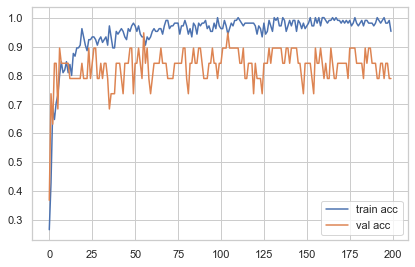

average acc = 0.9478095266222953
average val acc = 0.8321052683889866
max acc = 1.0
max val acc = 0.9473684430122375


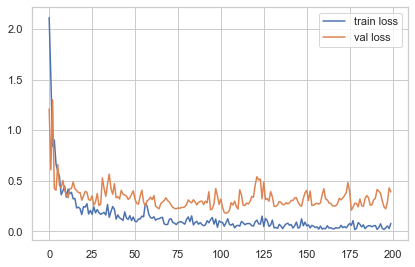

average loss = 0.1410092443600297
average val loss = 0.33393032900989056
max loss = 2.1127500534057617
max val loss = 1.3001941442489624


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history9.history['accuracy'], label='train acc')
plt.plot(history9.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta9 = np.mean(history9.history['accuracy'])
print('average acc = {}'.format(ta9))
va9 = np.mean(history9.history['val_accuracy'])
print('average val acc = {}'.format(va9))
ta9a = np.max(history9.history['accuracy'])
print('max acc = {}'.format(ta9a))
va9a = np.max(history9.history['val_accuracy'])
print('max val acc = {}'.format(va9a))

# loss
plt.plot(history9.history['loss'], label='train loss')
plt.plot(history9.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl9 = np.mean(history9.history['loss'])
print('average loss = {}'.format(tl9))
vl9 = np.mean(history9.history['val_loss'])
print('average val loss = {}'.format(vl9))
tl9a = np.max(history9.history['loss'])
print('max loss = {}'.format(tl9a))
vl9a = np.max(history9.history['val_loss'])
print('max val loss = {}'.format(vl9a))

In [20]:
score9 = model9.evaluate(x_test9, y_test9,  verbose=0)
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])

Test loss: 0.17351895570755005
Test accuracy: 0.9285714030265808


In [21]:
Y_pred9 = model9.predict_generator(x_test9)
y_pred9 = np.argmax(Y_pred9, axis=1)
y_test9 = np.argmax(y_test9, axis=1)
cm9 = confusion_matrix(y_test9, y_pred9)
print(cm9)

[[ 9  1  0  0]
 [ 2  9  0  0]
 [ 0  0 10  0]
 [ 0  0  0 11]]


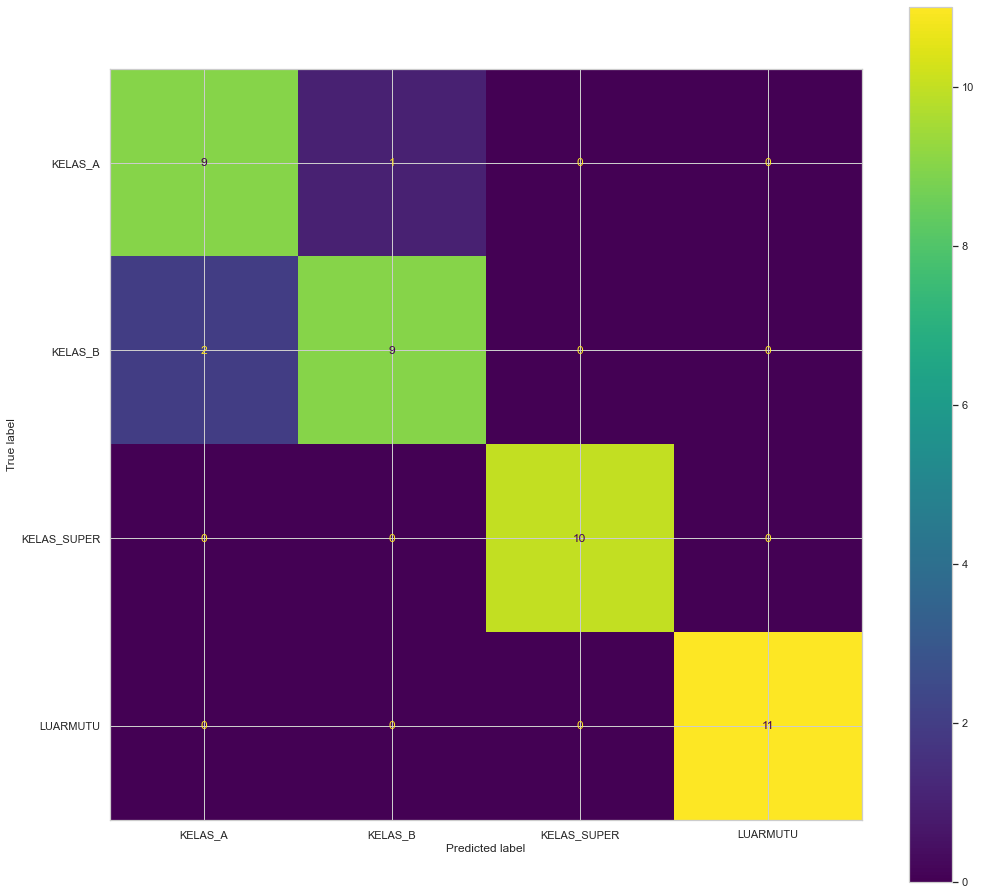

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test9, y_pred9, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test9, y_pred9, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.82      0.90      0.86        10
     KELAS_B       0.90      0.82      0.86        11
 KELAS_SUPER       1.00      1.00      1.00        10
    LUARMUTU       1.00      1.00      1.00        11

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



# -----------------------------------------------------------------

# Model 10

# Training

In [16]:
model10.compile(optimizer=Adam(lr=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history10 = model10.fit(datagen.flow(x_train10, y_train10),
            validation_data=(x_val10, y_val10),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 28s 6s/step - loss: 11.0365 - accuracy: 0.1714 - val_loss: 4.1981 - val_accuracy: 0.3684
Epoch 2/200
4/4 [==============================] - 2s 463ms/step - loss: 4.9284 - accuracy: 0.5238 - val_loss: 2.9582 - val_accuracy: 0.6316
Epoch 3/200
4/4 [==============================] - 2s 383ms/step - loss: 2.4594 - accuracy: 0.6190 - val_loss: 1.8131 - val_accuracy: 0.6316
Epoch 4/200
4/4 [==============================] - 2s 547ms/step - loss: 2.1912 - accuracy: 0.6762 - val_loss: 0.9877 - val_accuracy: 0.6842
Epoch 5/200
4/4 [==============================] - 2s 558ms/step - loss: 2.5043 - accuracy: 0.7143 - val_loss: 0.6916 - val_accuracy: 0.7368
Epoch 6/200
4/4 [==============================] - 2s 555ms/step - loss: 1.7915 - accuracy: 0.7238 - val_loss: 3.8512 - val_accuracy: 0.5789
Epoch 7/200
4/4 [==============================] - 2s 462ms/step - loss: 2.4981 - accuracy: 0.6952 - val_loss: 0.5619 - val_accuracy: 0.7895
Epoch 8/200
4/

Epoch 59/200
4/4 [==============================] - 2s 555ms/step - loss: 1.4567 - accuracy: 0.7619 - val_loss: 1.3397 - val_accuracy: 0.8421
Epoch 60/200
4/4 [==============================] - 2s 463ms/step - loss: 1.4591 - accuracy: 0.8857 - val_loss: 1.1405 - val_accuracy: 0.7895
Epoch 61/200
4/4 [==============================] - 2s 468ms/step - loss: 1.1997 - accuracy: 0.8667 - val_loss: 1.5831 - val_accuracy: 0.7368
Epoch 62/200
4/4 [==============================] - 2s 546ms/step - loss: 0.6335 - accuracy: 0.8571 - val_loss: 1.1037 - val_accuracy: 0.7368
Epoch 63/200
4/4 [==============================] - 2s 393ms/step - loss: 0.8636 - accuracy: 0.9048 - val_loss: 2.2133 - val_accuracy: 0.6842
Epoch 64/200
4/4 [==============================] - 2s 388ms/step - loss: 0.8045 - accuracy: 0.8667 - val_loss: 0.9142 - val_accuracy: 0.8947
Epoch 65/200
4/4 [==============================] - 2s 391ms/step - loss: 0.6670 - accuracy: 0.9238 - val_loss: 0.5821 - val_accuracy: 0.7895
Epoch 

4/4 [==============================] - 2s 460ms/step - loss: 0.0765 - accuracy: 0.9905 - val_loss: 0.4681 - val_accuracy: 0.8947
Epoch 174/200
4/4 [==============================] - 2s 469ms/step - loss: 0.8010 - accuracy: 0.9429 - val_loss: 0.3986 - val_accuracy: 0.9474
Epoch 175/200
4/4 [==============================] - 2s 449ms/step - loss: 0.1116 - accuracy: 0.9810 - val_loss: 0.6412 - val_accuracy: 0.8947
Epoch 176/200
4/4 [==============================] - 2s 562ms/step - loss: 0.1935 - accuracy: 0.9524 - val_loss: 0.2771 - val_accuracy: 0.8947
Epoch 177/200
4/4 [==============================] - 2s 378ms/step - loss: 0.0553 - accuracy: 0.9810 - val_loss: 0.4199 - val_accuracy: 0.8421
Epoch 178/200
4/4 [==============================] - 2s 382ms/step - loss: 0.0512 - accuracy: 0.9810 - val_loss: 0.4496 - val_accuracy: 0.8421
Epoch 179/200
4/4 [==============================] - 2s 389ms/step - loss: 0.1890 - accuracy: 0.9810 - val_loss: 0.6668 - val_accuracy: 0.8421
Epoch 180/200

# evaluasi testing dan visualisasi

In [18]:
history10.history

{'loss': [11.036486625671387,
  4.928421974182129,
  2.4593613147735596,
  2.191182851791382,
  2.5043272972106934,
  1.7914732694625854,
  2.4981398582458496,
  1.6253759860992432,
  1.1816108226776123,
  0.9923038482666016,
  0.5647643208503723,
  0.9025672674179077,
  0.9085721969604492,
  0.8190593123435974,
  0.609623372554779,
  0.26747968792915344,
  0.6890789866447449,
  0.6701635718345642,
  0.5280895233154297,
  0.3804207146167755,
  0.4127039611339569,
  0.5907732844352722,
  0.5443791151046753,
  0.26642051339149475,
  0.5058675408363342,
  0.5693269371986389,
  0.3948363959789276,
  0.29203665256500244,
  0.5147971510887146,
  0.4877660572528839,
  0.36449459195137024,
  0.6156816482543945,
  0.45011886954307556,
  0.4379054009914398,
  0.48185113072395325,
  0.20247237384319305,
  0.577107310295105,
  0.4251139461994171,
  0.5845766067504883,
  0.4349290430545807,
  1.1576937437057495,
  0.07525724917650223,
  0.6326591372489929,
  0.6091147065162659,
  0.2784969806671142

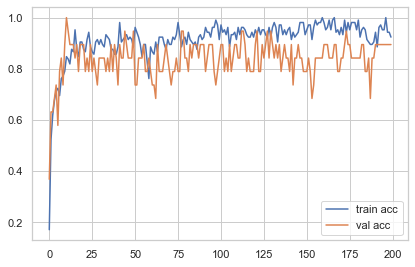

average acc = 0.9141428620368243
average val acc = 0.8381578986346722
max acc = 1.0
max val acc = 1.0


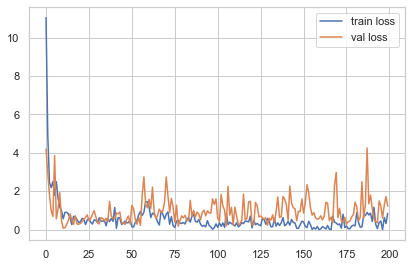

average loss = 0.5554245026913123
average val loss = 0.9648840878158808
max loss = 11.036486625671387
max val loss = 4.250985622406006


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history10.history['accuracy'], label='train acc')
plt.plot(history10.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta10 = np.mean(history10.history['accuracy'])
print('average acc = {}'.format(ta10))
va10 = np.mean(history10.history['val_accuracy'])
print('average val acc = {}'.format(va10))
ta10a = np.max(history10.history['accuracy'])
print('max acc = {}'.format(ta10a))
va10a = np.max(history10.history['val_accuracy'])
print('max val acc = {}'.format(va10a))

# loss
plt.plot(history10.history['loss'], label='train loss')
plt.plot(history10.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl10 = np.mean(history10.history['loss'])
print('average loss = {}'.format(tl10))
vl10 = np.mean(history10.history['val_loss'])
print('average val loss = {}'.format(vl10))
tl10a = np.max(history10.history['loss'])
print('max loss = {}'.format(tl10a))
vl10a = np.max(history10.history['val_loss'])
print('max val loss = {}'.format(vl10a))

In [20]:
score10 = model10.evaluate(x_test10, y_test10,  verbose=0)
print('Test loss:', score10[0])
print('Test accuracy:', score10[1])

Test loss: 3.122593402862549
Test accuracy: 0.8333333134651184


In [21]:
Y_pred10 = model10.predict_generator(x_test10)
y_pred10 = np.argmax(Y_pred10, axis=1)
y_test10 = np.argmax(y_test10, axis=1)
cm10 = confusion_matrix(y_test10, y_pred10)
print(cm10)


[[ 5  4  2  0]
 [ 0  5  0  0]
 [ 0  1 11  0]
 [ 0  0  0 14]]


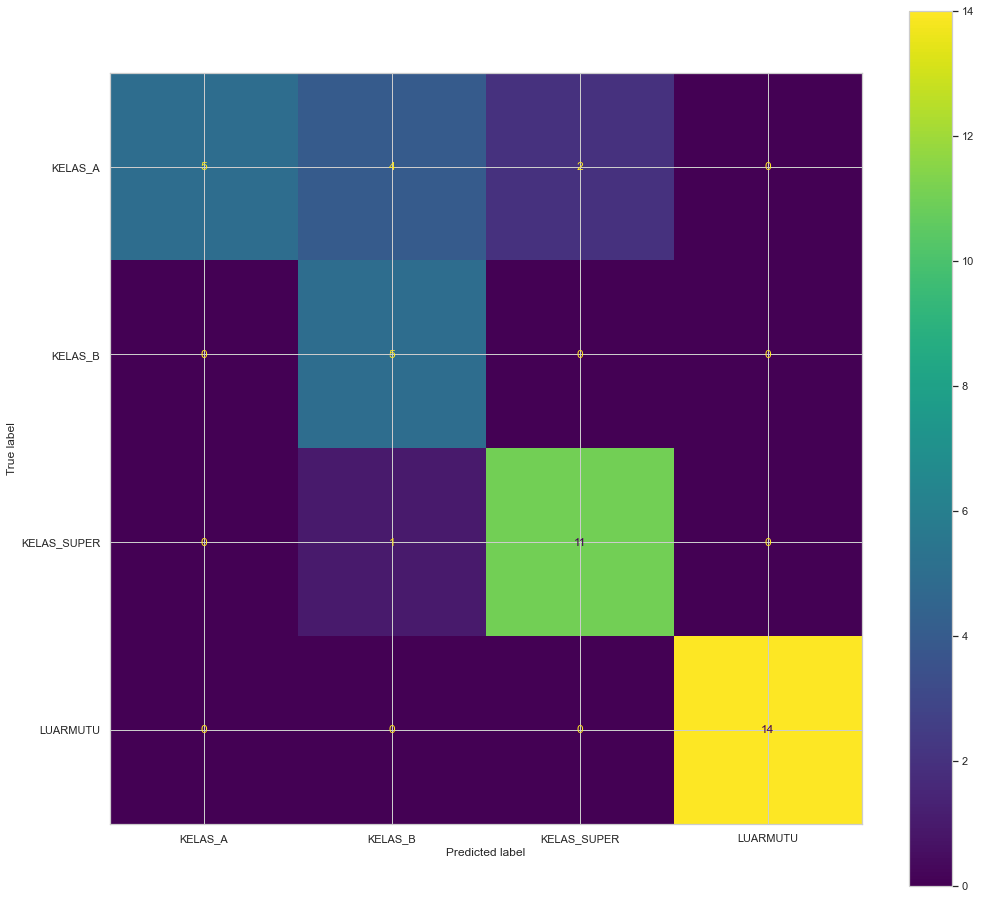

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test10, y_pred10, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test10, y_pred10, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       1.00      0.45      0.62        11
     KELAS_B       0.50      1.00      0.67         5
 KELAS_SUPER       0.85      0.92      0.88        12
    LUARMUTU       1.00      1.00      1.00        14

    accuracy                           0.83        42
   macro avg       0.84      0.84      0.79        42
weighted avg       0.90      0.83      0.83        42



# --------------------------------------------------------

# Model 11

# training

In [16]:
model11.compile(optimizer=Adam(lr=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history11 = model11.fit(datagen.flow(x_train11,y_train11),
            validation_data=(x_val11, y_val11),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 28s 5s/step - loss: 1.7200 - accuracy: 0.1905 - val_loss: 1.3116 - val_accuracy: 0.4211
Epoch 2/200
4/4 [==============================] - 2s 548ms/step - loss: 1.4562 - accuracy: 0.3238 - val_loss: 1.1851 - val_accuracy: 0.6316
Epoch 3/200
4/4 [==============================] - 2s 386ms/step - loss: 1.3738 - accuracy: 0.2857 - val_loss: 1.0430 - val_accuracy: 0.6316
Epoch 4/200
4/4 [==============================] - 2s 388ms/step - loss: 1.1283 - accuracy: 0.4952 - val_loss: 0.9125 - val_accuracy: 0.6842
Epoch 5/200
4/4 [==============================] - 2s 557ms/step - loss: 1.0124 - accuracy: 0.5810 - val_loss: 0.8334 - val_accuracy: 0.7368
Epoch 6/200
4/4 [==============================] - 2s 390ms/step - loss: 0.9795 - accuracy: 0.5810 - val_loss: 0.7914 - val_accuracy: 0.7368
Epoch 7/200
4/4 [==============================] - 2s 449ms/step - loss: 1.0093 - accuracy: 0.5524 - val_loss: 0.7667 - val_accuracy: 0.6842
Epoch 8/200
4/4

Epoch 59/200
4/4 [==============================] - 2s 389ms/step - loss: 0.3527 - accuracy: 0.8857 - val_loss: 0.3018 - val_accuracy: 0.8947
Epoch 60/200
4/4 [==============================] - 2s 460ms/step - loss: 0.3227 - accuracy: 0.8952 - val_loss: 0.2962 - val_accuracy: 0.8421
Epoch 61/200
4/4 [==============================] - 2s 563ms/step - loss: 0.3661 - accuracy: 0.8476 - val_loss: 0.3108 - val_accuracy: 0.8421
Epoch 62/200
4/4 [==============================] - 2s 393ms/step - loss: 0.3270 - accuracy: 0.8762 - val_loss: 0.3116 - val_accuracy: 0.8421
Epoch 63/200
4/4 [==============================] - 2s 457ms/step - loss: 0.3158 - accuracy: 0.9048 - val_loss: 0.3020 - val_accuracy: 0.8421
Epoch 64/200
4/4 [==============================] - 2s 463ms/step - loss: 0.3138 - accuracy: 0.8952 - val_loss: 0.2908 - val_accuracy: 0.8421
Epoch 65/200
4/4 [==============================] - 2s 397ms/step - loss: 0.3306 - accuracy: 0.8857 - val_loss: 0.2892 - val_accuracy: 0.8421
Epoch 

4/4 [==============================] - 2s 387ms/step - loss: 0.1391 - accuracy: 0.9714 - val_loss: 0.1975 - val_accuracy: 0.9474
Epoch 174/200
4/4 [==============================] - 2s 390ms/step - loss: 0.1728 - accuracy: 0.9524 - val_loss: 0.2114 - val_accuracy: 0.8947
Epoch 175/200
4/4 [==============================] - 2s 570ms/step - loss: 0.2219 - accuracy: 0.9143 - val_loss: 0.2138 - val_accuracy: 0.8947
Epoch 176/200
4/4 [==============================] - 2s 466ms/step - loss: 0.1725 - accuracy: 0.9619 - val_loss: 0.1986 - val_accuracy: 0.8947
Epoch 177/200
4/4 [==============================] - 2s 557ms/step - loss: 0.1526 - accuracy: 0.9524 - val_loss: 0.1794 - val_accuracy: 0.9474
Epoch 178/200
4/4 [==============================] - 2s 465ms/step - loss: 0.1432 - accuracy: 0.9714 - val_loss: 0.1817 - val_accuracy: 0.8947
Epoch 179/200
4/4 [==============================] - 2s 392ms/step - loss: 0.2140 - accuracy: 0.9048 - val_loss: 0.1867 - val_accuracy: 0.9474
Epoch 180/200

# evaluasi testing dan visualisasi

In [18]:
history11.history

{'loss': [1.7200448513031006,
  1.456229329109192,
  1.3738311529159546,
  1.1282594203948975,
  1.0123536586761475,
  0.9794546961784363,
  1.009259581565857,
  0.9570399522781372,
  0.9243552684783936,
  0.9040629267692566,
  0.7822067141532898,
  0.7470759749412537,
  0.7729169726371765,
  0.7127732038497925,
  0.659521758556366,
  0.675267219543457,
  0.7381008863449097,
  0.6339342594146729,
  0.6341215372085571,
  0.6575503349304199,
  0.573704719543457,
  0.6025874018669128,
  0.6007246971130371,
  0.5540903210639954,
  0.5533984899520874,
  0.5403897762298584,
  0.4695175290107727,
  0.5033281445503235,
  0.4756229817867279,
  0.459566205739975,
  0.4556048512458801,
  0.48827099800109863,
  0.4306429922580719,
  0.4544646441936493,
  0.4199504554271698,
  0.3859409987926483,
  0.433764785528183,
  0.42309558391571045,
  0.43762731552124023,
  0.3578585386276245,
  0.40221574902534485,
  0.4678420424461365,
  0.43041300773620605,
  0.403543621301651,
  0.41090989112854004,
  0.

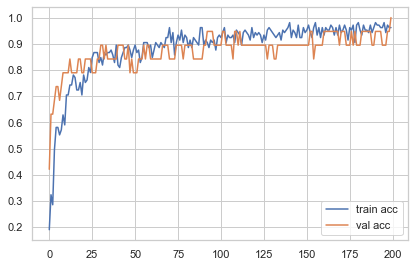

average acc = 0.886761910840869
average val acc = 0.8744736847281456
max acc = 0.9809523820877075
max val acc = 1.0


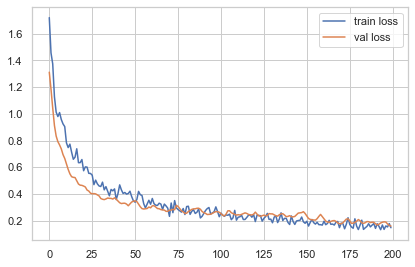

average loss = 0.33271407656371593
average val loss = 0.3075197238475084
max loss = 1.7200448513031006
max val loss = 1.3115898370742798


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history11.history['accuracy'], label='train acc')
plt.plot(history11.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta11 = np.mean(history11.history['accuracy'])
print('average acc = {}'.format(ta11))
va11 = np.mean(history11.history['val_accuracy'])
print('average val acc = {}'.format(va11))
ta11a = np.max(history11.history['accuracy'])
print('max acc = {}'.format(ta11a))
va11a = np.max(history11.history['val_accuracy'])
print('max val acc = {}'.format(va11a))


# loss
plt.plot(history11.history['loss'], label='train loss')
plt.plot(history11.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl11 = np.mean(history11.history['loss'])
print('average loss = {}'.format(tl11))
vl11 = np.mean(history11.history['val_loss'])
print('average val loss = {}'.format(vl11))
tl11a = np.max(history11.history['loss'])
print('max loss = {}'.format(tl11a))
vl11a = np.max(history11.history['val_loss'])
print('max val loss = {}'.format(vl11a))

In [29]:
score11 = model11.evaluate(x_test11, y_test11,  verbose=0)
print('Test loss:', score11[0])
print('Test accuracy:', score11[1])

Test loss: 0.4315696060657501
Test accuracy: 0.8095238208770752


In [30]:
Y_pred11 = model11.predict_generator(x_test11)
y_pred11 = np.argmax(Y_pred11, axis=1)
y_test11 = np.argmax(y_test11, axis=1)
cm11 = confusion_matrix(y_test11, y_pred11)
print(cm11)

[[ 5  4  1  0]
 [ 2  9  0  0]
 [ 1  0 12  0]
 [ 0  0  0  8]]


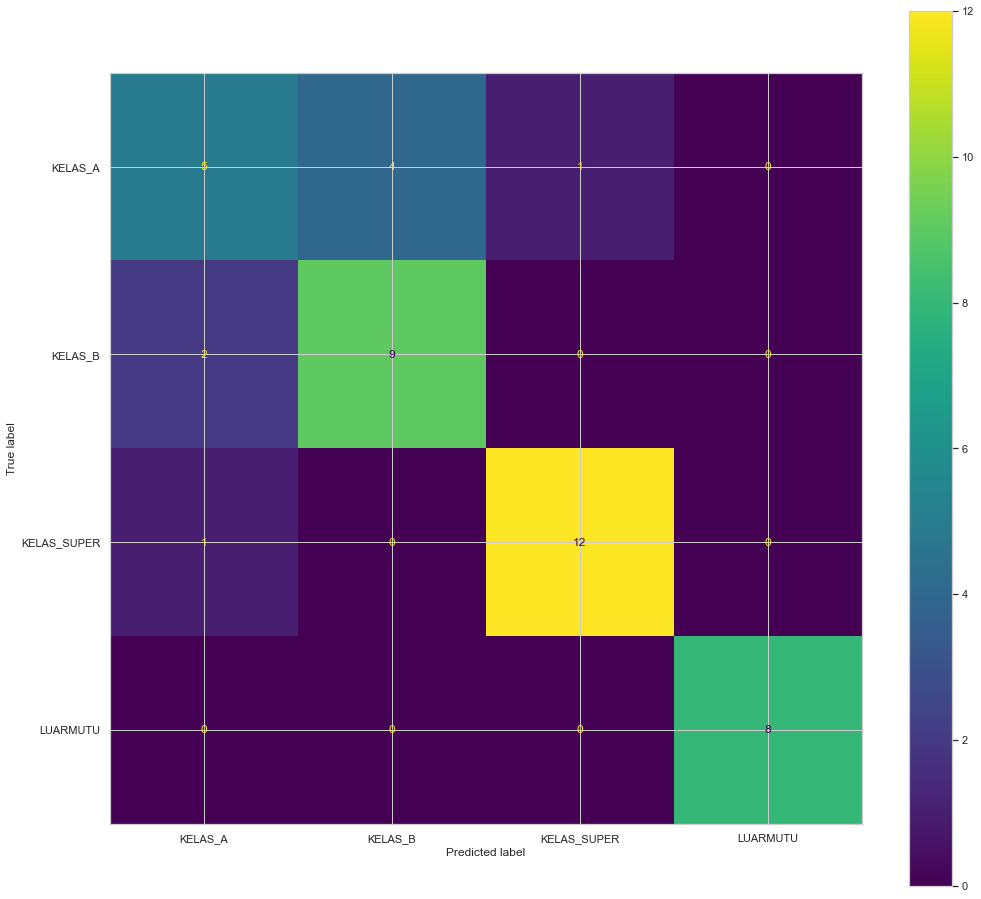

In [31]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test11, y_pred11, ax=ax, display_labels=target_names)
plt.show()

In [32]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test11, y_pred11, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.62      0.50      0.56        10
     KELAS_B       0.69      0.82      0.75        11
 KELAS_SUPER       0.92      0.92      0.92        13
    LUARMUTU       1.00      1.00      1.00         8

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.80        42



# -----------------------------------------------------------

# Model 12

# training

In [16]:
model12.compile(optimizer=Adam(lr=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history12 =model12.fit(datagen.flow(x_train12, y_train12),
            validation_data=(x_val12, y_val12),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 28s 5s/step - loss: 1.6120 - accuracy: 0.2381 - val_loss: 1.3128 - val_accuracy: 0.3684
Epoch 2/200
4/4 [==============================] - 2s 381ms/step - loss: 1.2322 - accuracy: 0.4476 - val_loss: 1.1839 - val_accuracy: 0.4211
Epoch 3/200
4/4 [==============================] - 2s 457ms/step - loss: 0.8207 - accuracy: 0.6857 - val_loss: 0.8304 - val_accuracy: 0.5789
Epoch 4/200
4/4 [==============================] - 2s 386ms/step - loss: 0.7127 - accuracy: 0.6952 - val_loss: 0.7676 - val_accuracy: 0.5789
Epoch 5/200
4/4 [==============================] - 2s 460ms/step - loss: 0.6011 - accuracy: 0.7905 - val_loss: 0.7576 - val_accuracy: 0.6316
Epoch 6/200
4/4 [==============================] - 2s 462ms/step - loss: 0.4854 - accuracy: 0.8190 - val_loss: 0.6433 - val_accuracy: 0.7368
Epoch 7/200
4/4 [==============================] - 2s 452ms/step - loss: 0.4341 - accuracy: 0.8000 - val_loss: 0.6167 - val_accuracy: 0.6842
Epoch 8/200
4/4

Epoch 59/200
4/4 [==============================] - 2s 469ms/step - loss: 0.1247 - accuracy: 0.9619 - val_loss: 0.3807 - val_accuracy: 0.8421
Epoch 60/200
4/4 [==============================] - 2s 459ms/step - loss: 0.1244 - accuracy: 0.9714 - val_loss: 0.5073 - val_accuracy: 0.7895
Epoch 61/200
4/4 [==============================] - 2s 390ms/step - loss: 0.1623 - accuracy: 0.9524 - val_loss: 0.4882 - val_accuracy: 0.7895
Epoch 62/200
4/4 [==============================] - 2s 392ms/step - loss: 0.1550 - accuracy: 0.9333 - val_loss: 0.3554 - val_accuracy: 0.8947
Epoch 63/200
4/4 [==============================] - 2s 467ms/step - loss: 0.1340 - accuracy: 0.9619 - val_loss: 0.3466 - val_accuracy: 0.8421
Epoch 64/200
4/4 [==============================] - 2s 471ms/step - loss: 0.1392 - accuracy: 0.9524 - val_loss: 0.4888 - val_accuracy: 0.7368
Epoch 65/200
4/4 [==============================] - 2s 467ms/step - loss: 0.1561 - accuracy: 0.9524 - val_loss: 0.5011 - val_accuracy: 0.7895
Epoch 

4/4 [==============================] - 2s 467ms/step - loss: 0.0503 - accuracy: 1.0000 - val_loss: 0.4384 - val_accuracy: 0.8947
Epoch 174/200
4/4 [==============================] - 2s 470ms/step - loss: 0.0646 - accuracy: 0.9905 - val_loss: 0.6209 - val_accuracy: 0.7895
Epoch 175/200
4/4 [==============================] - 2s 378ms/step - loss: 0.0705 - accuracy: 0.9714 - val_loss: 0.6373 - val_accuracy: 0.8421
Epoch 176/200
4/4 [==============================] - 2s 550ms/step - loss: 0.0614 - accuracy: 0.9810 - val_loss: 0.4722 - val_accuracy: 0.8947
Epoch 177/200
4/4 [==============================] - 2s 465ms/step - loss: 0.0530 - accuracy: 0.9905 - val_loss: 0.4172 - val_accuracy: 0.8947
Epoch 178/200
4/4 [==============================] - 2s 452ms/step - loss: 0.0388 - accuracy: 0.9905 - val_loss: 0.4031 - val_accuracy: 0.8947
Epoch 179/200
4/4 [==============================] - 2s 558ms/step - loss: 0.0577 - accuracy: 0.9905 - val_loss: 0.4377 - val_accuracy: 0.8947
Epoch 180/200

# evaluasi testing dan visualisasi

In [18]:
history12.history

{'loss': [1.6119585037231445,
  1.232214331626892,
  0.8206890225410461,
  0.7127429842948914,
  0.6010655760765076,
  0.4854297339916229,
  0.4341181218624115,
  0.4237140119075775,
  0.393128901720047,
  0.40920254588127136,
  0.40134575963020325,
  0.36687135696411133,
  0.32256919145584106,
  0.3674798905849457,
  0.32850196957588196,
  0.3110898733139038,
  0.2958155572414398,
  0.3115423321723938,
  0.2838078737258911,
  0.2835386395454407,
  0.26743650436401367,
  0.29409098625183105,
  0.3132634162902832,
  0.1941499561071396,
  0.21905279159545898,
  0.2341005802154541,
  0.23559348285198212,
  0.24485649168491364,
  0.27850812673568726,
  0.1968286782503128,
  0.18065409362316132,
  0.23982791602611542,
  0.18944557011127472,
  0.20192617177963257,
  0.17723584175109863,
  0.17817704379558563,
  0.19920878112316132,
  0.14676575362682343,
  0.2307775467634201,
  0.18228957056999207,
  0.1575075089931488,
  0.17207321524620056,
  0.16942113637924194,
  0.10752677917480469,
  0

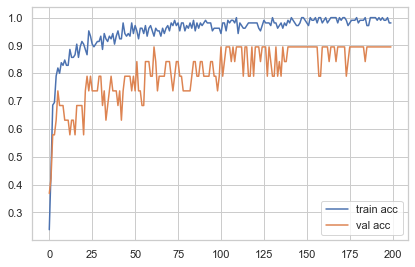

average acc = 0.9507142882794142
average val acc = 0.8081578941643238
max acc = 1.0
max val acc = 0.8947368264198303


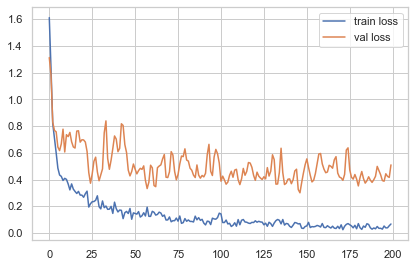

average loss = 0.14028280620463193
average val loss = 0.5071160088479519
max loss = 1.6119585037231445
max val loss = 1.3127552270889282


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history12.history['accuracy'], label='train acc')
plt.plot(history12.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta12 = np.mean(history12.history['accuracy'])
print('average acc = {}'.format(ta12))
va12 = np.mean(history12.history['val_accuracy'])
print('average val acc = {}'.format(va12))
ta12a = np.max(history12.history['accuracy'])
print('max acc = {}'.format(ta12a))
va12a = np.max(history12.history['val_accuracy'])
print('max val acc = {}'.format(va12a))

# loss
plt.plot(history12.history['loss'], label='train loss')
plt.plot(history12.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl12 = np.mean(history12.history['loss'])
print('average loss = {}'.format(tl12))
vl12 = np.mean(history12.history['val_loss'])
print('average val loss = {}'.format(vl12))
tl12a = np.max(history12.history['loss'])
print('max loss = {}'.format(tl12a))
vl12a = np.max(history12.history['val_loss'])
print('max val loss = {}'.format(vl12a))

In [20]:
score12 = model12.evaluate(x_test12, y_test12,  verbose=0)
print('Test loss:', score12[0])
print('Test accuracy:', score12[1])

Test loss: 0.5256010293960571
Test accuracy: 0.8333333134651184


In [21]:
Y_pred12 = model12.predict_generator(x_test12)
y_pred12 = np.argmax(Y_pred12, axis=1)
y_test12 = np.argmax(y_test12, axis=1)
cm12 = confusion_matrix(y_test12, y_pred12)
print(cm12)

[[ 6  4  1  0]
 [ 0  9  0  0]
 [ 0  0 11  0]
 [ 0  2  0  9]]


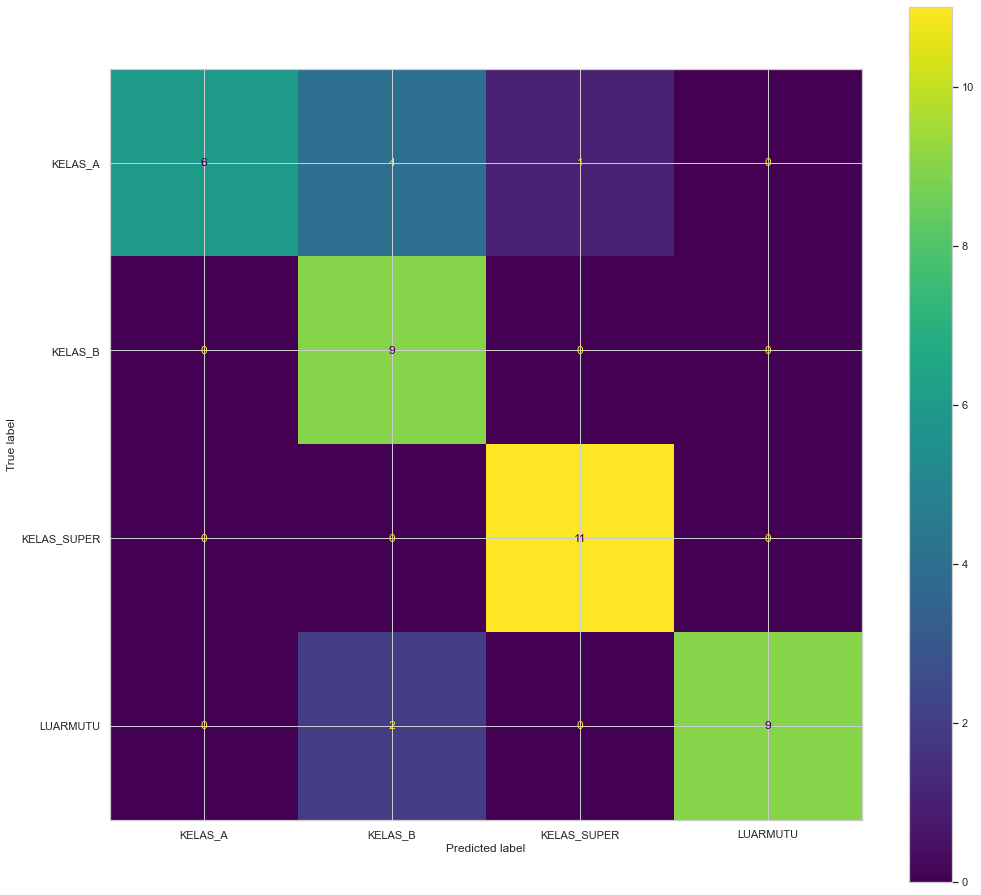

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test12, y_pred12, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test12, y_pred12, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       1.00      0.55      0.71        11
     KELAS_B       0.60      1.00      0.75         9
 KELAS_SUPER       0.92      1.00      0.96        11
    LUARMUTU       1.00      0.82      0.90        11

    accuracy                           0.83        42
   macro avg       0.88      0.84      0.83        42
weighted avg       0.89      0.83      0.83        42



# Implementasi Dropout ke model terbaik dengan epochs 100
# sesuaikan kembali Lr

# model x dengan dropout 0.25

In [ ]:
xa = tf.keras.layers.Flatten()(last_output)
xa = tf.keras.layers.Dropout(0.25)(xa)
xa = tf.keras.layers.Dense(4, activation='softmax')(xa)
model13 = tf.keras.Model(inceptionv3.input, xa)
model13.summary()

In [ ]:
model13.compile(optimizer=Adam(lr=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history13 = model13.fit(datagen.flow(x_train13, y_train13),
            validation_data=(x_val13, y_val13),
            epochs=100)

# evaluasi test dan visualisasi

In [ ]:
history13.history

In [ ]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history13.history['accuracy'], label='train acc')
plt.plot(history13.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta13 = np.mean(history13.history['accuracy'])
print('average acc = {}'.format(ta13))
va13 = np.mean(history13.history['val_accuracy'])
print('average val acc = {}'.format(va13))
ta13a = np.max(history13.history['accuracy'])
print('max acc = {}'.format(ta13a))
va13a = np.max(history13.history['val_accuracy'])
print('max val acc = {}'.format(va13a))

# loss
plt.plot(history13.history['loss'], label='train loss')
plt.plot(history13.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl13 = np.mean(history13.history['loss'])
print('average loss = {}'.format(tl13))
vl13 = np.mean(history13.history['val_loss'])
print('average val loss = {}'.format(vl13))
tl13a = np.max(history13.history['loss'])
print('max loss = {}'.format(tl13a))
vl13a = np.max(history13.history['val_loss'])
print('max val loss = {}'.format(vl13a))

In [ ]:
score13 = model13.evaluate(x_test21, y_test21,  verbose=0)
print('Test loss:', score13[0])
print('Test accuracy:', score13[1])

In [ ]:
Y_pred13 = model13.predict_generator(x_test21)
y_pred13 = np.argmax(Y_pred13, axis=1)
y_test13 = np.argmax(y_test21, axis=1)
cm13 = confusion_matrix(y_test13, y_pred13)
print(cm13)

In [ ]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test13, y_pred13, ax=ax, display_labels=target_names)
plt.show()

In [ ]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test13, y_pred13, target_names=target_names))

# -------------------------------------------------------

# model x dengan dropout 0.5

In [ ]:
xb = tf.keras.layers.Flatten()(last_output)
xb = tf.keras.layers.Dropout(0.5)(xb)
xb = tf.keras.layers.Dense(4, activation='softmax')(xb)
model14 = tf.keras.Model(inceptionv3.input, xb)
model14.summary()

In [ ]:
model14.compile(optimizer=Adam(lr=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history14 = model14.fit(datagen.flow(x_train14, y_train14),
            validation_data=(x_val14, y_val14),
            epochs=100)

# evaluasi test dan visualisasi

In [ ]:
history14.history

In [ ]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history14.history['accuracy'], label='train acc')
plt.plot(history14.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta14 = np.mean(history14.history['accuracy'])
print('average acc = {}'.format(ta14))
va14 = np.mean(history14.history['val_accuracy'])
print('average val acc = {}'.format(va14))
ta14a = np.max(history14.history['accuracy'])
print('max acc = {}'.format(ta14a))
va14a = np.max(history14.history['val_accuracy'])
print('max val acc = {}'.format(va14a))

# loss
plt.plot(history14.history['loss'], label='train loss')
plt.plot(history14.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl14 = np.mean(history14.history['loss'])
print('average loss = {}'.format(tl14))
vl14 = np.mean(history14.history['val_loss'])
print('average val loss = {}'.format(vl14))
tl14a = np.max(history14.history['loss'])
print('max loss = {}'.format(tl14a))
vl14a = np.max(history14.history['val_loss'])
print('max val loss = {}'.format(vl14a))

In [ ]:
score14 = model14.evaluate(x_test14, y_test14,  verbose=0)
print('Test loss:', score14[0])
print('Test accuracy:', score14[1])

In [ ]:
Y_pred14 = model14.predict_generator(x_test14)
y_pred14 = np.argmax(Y_pred14, axis=1)
y_test14 = np.argmax(y_test14, axis=1)
cm14 = confusion_matrix(y_test14, y_pred14)
print(cm14)

In [ ]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test14, y_pred14, ax=ax, display_labels=target_names)
plt.show()

In [ ]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test14, y_pred14, target_names=target_names))

# -----------------------------------------------------------

# model x dengan dropout 0.75

In [ ]:
xc = tf.keras.layers.Flatten()(last_output)
xc = tf.keras.layers.Dropout(0.75)(xc)
xc = tf.keras.layers.Dense(4, activation='softmax')(xc)
model15 = tf.keras.Model(inceptionv3.input, xc)
model15.summary()

In [ ]:
model15.compile(optimizer=Adam(lr=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history15=model15.fit(datagen.flow(x_train15, y_train15),
            validation_data=(x_val15, y_val15),
            epochs=100)

# evaluasi testing dan visualisasi

In [ ]:
history15.history

In [ ]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history15.history['accuracy'], label='train acc')
plt.plot(history15.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta15 = np.mean(history15.history['accuracy'])
print('average acc = {}'.format(ta15))
va15 = np.mean(history15.history['val_accuracy'])
print('average val acc = {}'.format(va15))
ta15a = np.max(history15.history['accuracy'])
print('max acc = {}'.format(ta15a))
va15a = np.max(history15.history['val_accuracy'])
print('max val acc = {}'.format(va15a))

# loss
plt.plot(history15.history['loss'], label='train loss')
plt.plot(history15.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl15 = np.mean(history15.history['loss'])
print('average loss = {}'.format(tl15))
vl15 = np.mean(history15.history['val_loss'])
print('average val loss = {}'.format(vl15))
tl15a = np.max(history15.history['loss'])
print('max loss = {}'.format(tl15a))
vl15a = np.max(history15.history['val_loss'])
print('max val loss = {}'.format(vl15a))

In [ ]:
score15 = model15.evaluate(x_test15, y_test15,  verbose=0)
print('Test loss:', score15[0])
print('Test accuracy:', score15[1])

In [ ]:
Y_pred15 = model15.predict_generator(x_test15)
y_pred15 = np.argmax(Y_pred15, axis=1)
y_test15 = np.argmax(y_test15, axis=1)
cm15 = confusion_matrix(y_test15, y_pred15)
print(cm15)

In [ ]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test15, y_pred15, ax=ax, display_labels=target_names)
plt.show()

In [ ]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test15, y_pred15, target_names=target_names))

# --------------------------------------------------------------------------------

# Implementasi Dropout ke model terbaik dengan epochs 200
# sesuaikan kembali Lr

# Model x dengan dropout 0.25

# Training

In [ ]:
xd = tf.keras.layers.Flatten()(last_output)
xd = tf.keras.layers.Dropout(0.25)(xd)
xd = tf.keras.layers.Dense(4, activation='softmax')(xd)
model16 = tf.keras.Model(inceptionv3.input, xd)
model16.summary()

In [ ]:
model16.compile(optimizer=Adam(lr=0.00005), #sesuaikan LR-nya
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history16 = model16.fit(datagen.flow(x_train16, y_train16),
            validation_data=(x_val16, y_val16),
            epochs=200)

# evaluasi testing dan visualisasi

In [ ]:
history16.history

In [ ]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history16.history['accuracy'], label='train acc')
plt.plot(history16.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta16 = np.mean(history16.history['accuracy'])
print('average acc = {}'.format(ta16))
va16 = np.mean(history16.history['val_accuracy'])
print('average val acc = {}'.format(va16))
ta16a = np.max(history16.history['accuracy'])
print('max acc = {}'.format(ta16a))
va16a = np.max(history16.history['val_accuracy'])
print('max val acc = {}'.format(va16a))

# loss
plt.plot(history16.history['loss'], label='train loss')
plt.plot(history16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl16 = np.mean(history16.history['loss'])
print('average loss = {}'.format(tl16))
vl16 = np.mean(history16.history['val_loss'])
print('average val loss = {}'.format(vl16))
tl16a = np.max(history16.history['loss'])
print('max loss = {}'.format(tl16a))
vl16a = np.max(history16.history['val_loss'])
print('max val loss = {}'.format(vl16a))

In [ ]:
score16 = model16.evaluate(x_test16, y_test16,  verbose=0)
print('Test loss:', score16[0])
print('Test accuracy:', score16[1])

In [ ]:
Y_pred16 = model16.predict_generator(x_test16)
y_pred16 = np.argmax(Y_pred16, axis=1)
y_test16 = np.argmax(y_test16, axis=1)
cm16 = confusion_matrix(y_test16, y_pred16)
print(cm16)

In [ ]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test16, y_pred16, ax=ax, display_labels=target_names)
plt.show()

In [ ]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test16, y_pred16, target_names=target_names))

# --------------------------------------------------------

# model x dengan dropout 0.5

# Training

In [ ]:
xe = tf.keras.layers.Flatten()(last_output)
xe = tf.keras.layers.Dropout(0.5)(xe)
xe = tf.keras.layers.Dense(4, activation='softmax')(xe)
model17 = tf.keras.Model(inceptionv3.input, xe)
model17.summary()

In [ ]:
model17.compile(optimizer=Adam(lr=0.00005), #sesuaikan LR-nya
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history17 = model17.fit(datagen.flow(x_train17, y_train17),
            validation_data=(x_val17, y_val17),
            epochs=200)

# evaluasi test dan visualisasi

In [ ]:
history17.history

In [ ]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history17.history['accuracy'], label='train acc')
plt.plot(history17.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta17 = np.mean(history17.history['accuracy'])
print('average acc = {}'.format(ta17))
va17 = np.mean(history17.history['val_accuracy'])
print('average val acc = {}'.format(va17))
ta17a = np.max(history17.history['accuracy'])
print('max acc = {}'.format(ta17a))
va17a = np.max(history17.history['val_accuracy'])
print('max val acc = {}'.format(va17a))

# loss
plt.plot(history17.history['loss'], label='train loss')
plt.plot(history17.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl17 = np.mean(history17.history['loss'])
print('average loss = {}'.format(tl17))
vl17 = np.mean(history17.history['val_loss'])
print('average val loss = {}'.format(vl17))
tl17a = np.max(history17.history['loss'])
print('max loss = {}'.format(tl17a))
vl17a = np.max(history17.history['val_loss'])
print('max val loss = {}'.format(vl17a))

In [ ]:
score17 = model17.evaluate(x_test17, y_test17,  verbose=0)
print('Test loss:', score17[0])
print('Test accuracy:', score17[1])

In [ ]:
Y_pred17 = model17.predict_generator(x_test17)
y_pred17 = np.argmax(Y_pred17, axis=1)
y_test17 = np.argmax(y_test17, axis=1)
cm17 = confusion_matrix(y_test17, y_pred17)
print(cm17)

In [ ]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test17, y_pred17, ax=ax, display_labels=target_names)
plt.show()

In [ ]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test17, y_pred17, target_names=target_names))

# ---------------------------------------------------------

# model x dengan dropout 0.75

# training

In [ ]:
xf = tf.keras.layers.Flatten()(last_output)
xf = tf.keras.layers.Dropout(0.75)(xf)
xf = tf.keras.layers.Dense(4, activation='softmax')(xf)
model18 = tf.keras.Model(inceptionv3.input, xf)
model18.summary()

In [ ]:
model18.compile(optimizer=Adam(lr=0.00005), #sesuaikan LR-nya
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history18 = model18.fit(datagen.flow(x_train18, y_train18),
            validation_data=(x_val18, y_val18),
            epochs=200)

# evaluasi testing dan visualisasi

In [ ]:
history18.history

In [ ]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history18.history['accuracy'], label='train acc')
plt.plot(history18.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta18 = np.mean(history18.history['accuracy'])
print('average acc = {}'.format(ta18))
va18 = np.mean(history18.history['val_accuracy'])
print('average val acc = {}'.format(va18))
ta18a = np.max(history18.history['accuracy'])
print('max acc = {}'.format(ta18a))
va18a = np.max(history18.history['val_accuracy'])
print('max val acc = {}'.format(va18a))

# loss
plt.plot(history18.history['loss'], label='train loss')
plt.plot(history18.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl18 = np.mean(history18.history['loss'])
print('average loss = {}'.format(tl18))
vl18 = np.mean(history18.history['val_loss'])
print('average val loss = {}'.format(vl18))
tl18a = np.max(history18.history['loss'])
print('max loss = {}'.format(tl18a))
vl18a = np.max(history18.history['val_loss'])
print('max val loss = {}'.format(vl18a))

In [ ]:
score18 = model18.evaluate(x_test18, y_test18,  verbose=0)
print('Test loss:', score18[0])
print('Test accuracy:', score18[1])

In [ ]:
Y_pred18 = model18.predict_generator(x_test18)
y_pred18 = np.argmax(Y_pred18, axis=1)
y_test18 = np.argmax(y_test18, axis=1)
cm18 = confusion_matrix(y_test18, y_pred18)
print(cm18)

In [ ]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test18, y_pred18, ax=ax, display_labels=target_names)
plt.show()

In [ ]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test18, y_pred18, target_names=target_names))

# Save model

In [ ]:
tf.saved_model.save(model12, "model12-291222-95acc")

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("model12-291222-95acc")
tflite_model = converter.convert()
open("model12-291222-95acc.tflite", "wb").write(tflite_model)